## 1) Business Objective:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as 
- i) denying the loan
- ii) reducing the amount of loan 
- iii) lending (to risky applicants) at a higher interest rate, etc. 
 
 #### Aim: This will ensure that the consumers capable of repaying the loan are not rejected , identification of such applicants using EDA is the aim of this case study.

## 2) Get Jupyter Ready
Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Importing the application dataset 
application=pd.read_csv(r"D:\Full Stack Data Science\18 Aug ( Bank Risk Analysis Resume Project)\application_data.csv")
application

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [3]:
# Importing the dataset previous
previous=pd.read_csv(r"D:\Full Stack Data Science\18 Aug ( Bank Risk Analysis Resume Project)\previous_application.csv")
previous

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
0                         SATURDAY                       15  ...   
1                         THURSDAY                       11  ...   
2                          TUESDAY                       11  ...   
3                           MONDAY                        7  ...   
4                         THURSDAY                        9  ...   
...                            ...                      ...  ...   
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                Connectivity         12.0            middle   
1                         XNA         36.0        low_action   
2                         XNA         12.0              high   
3                         XNA         12.0            middle   
4                         XNA         24.0              high   
...                       ...          ...               ...   
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0           POS mobile with interest            365243.0          -42.0   
1                   Cash X-Sell: low            365243.0         -134.0   
2                  Cash X-Sell: high            365243.0         -271.0   
3                Cash X-Sell: middle            365243.0         -482.0   
4                  Cash Street: high                 NaN            NaN   
...                              ...                 ...            ...   
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest      

In [4]:
# To get First 5 rows 
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

#### Dimension and size of dataset

In [6]:
application.shape  # (rows,columns)

(307511, 122)

In [7]:
previous.shape

(1670214, 37)

In [8]:
application.size   # rows*columns

37516342

In [9]:
previous.size

61797918

#### To check database column type

In [10]:
# To get information of data types of every coulumn 
application.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### To check numerical columns of dataframe

In [12]:
# Summary statistics of application dataset 
application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [13]:
# Summary Statistics of previous dataset
previous.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

## 4) Data Cleansing & Manipulation

In [14]:
# To check values of dataset
application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [15]:
import missingno as mn

<Axes: >

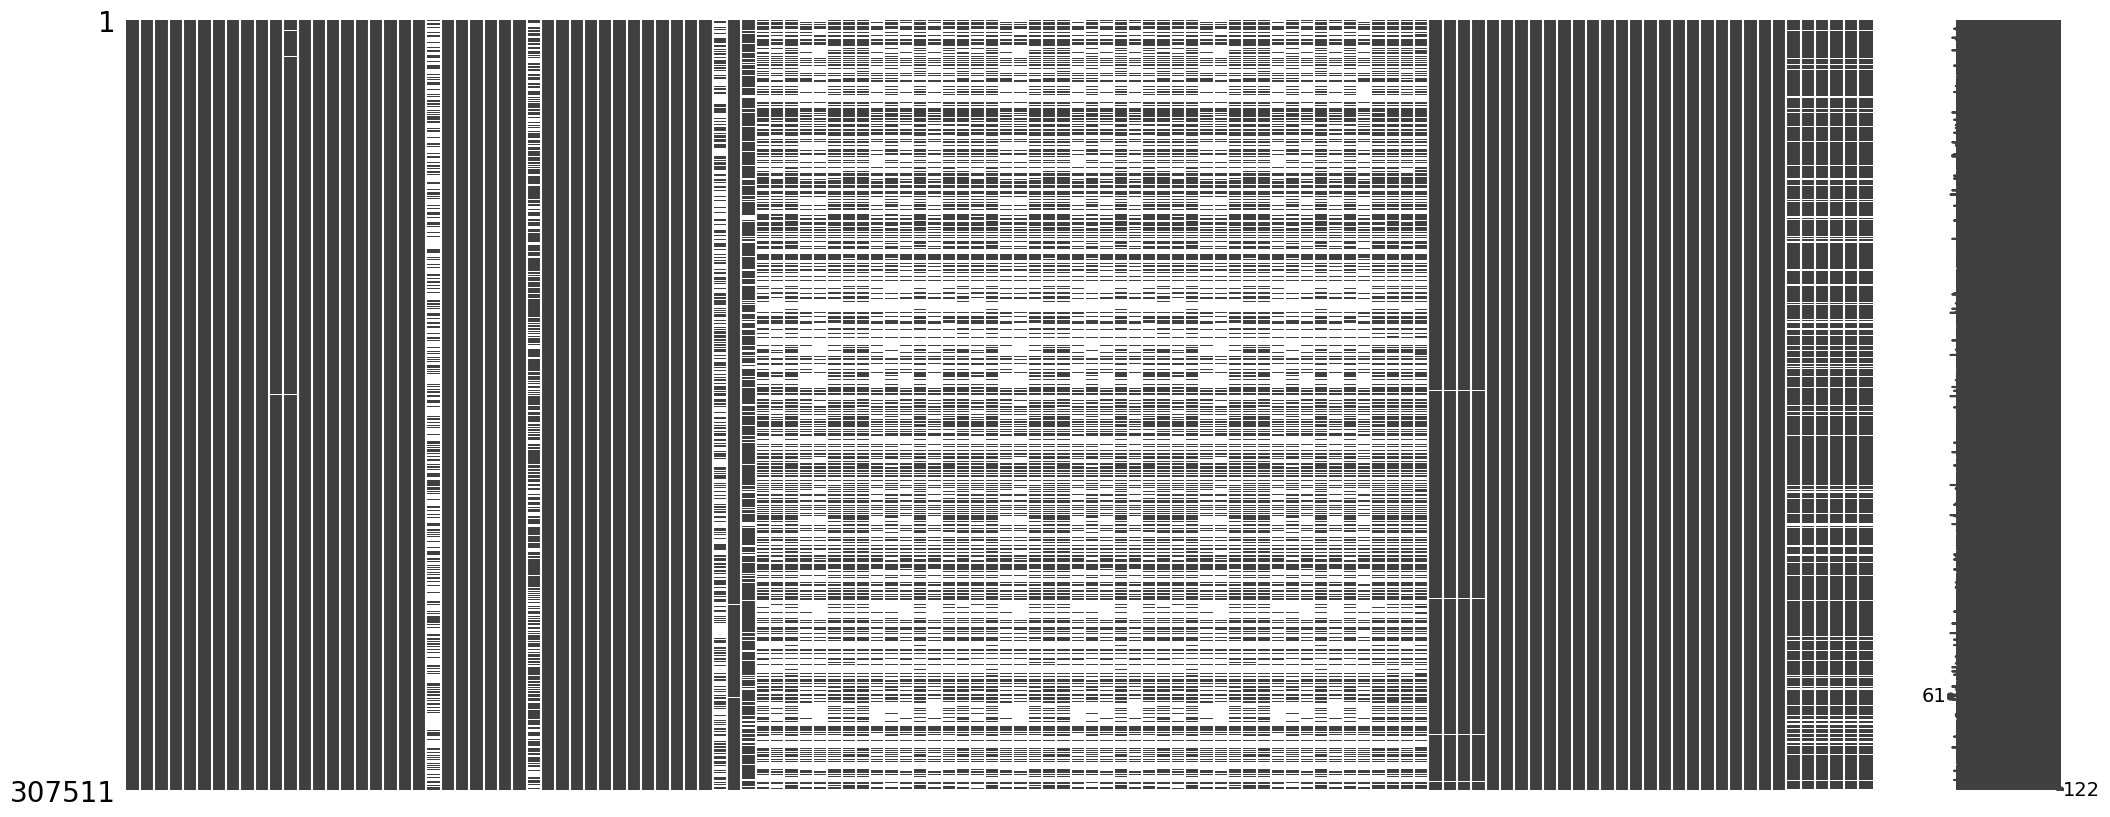

In [16]:
# Missing values matrix
mn.matrix(application)

#### Interpretation
From above graph we can see that there is many missing values in our dataset.

Lets check percentage of missing values.

In [17]:
missing_values=application.isnull().sum()
total_data=len(application)

In [18]:
## To find Missing values percentage in every columns
missing_percentage=(missing_values/total_data)*100
missing_percentage
for i in missing_percentage:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.003902299429939092
0.09040327012692229
0.42014757195677555
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
65.9908100848425
0.0
0.0
0.0
0.0
0.0
0.0
31.345545362604916
0.0006503832383231819
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
56.381072546998325
0.21462646864665005
19.825307062186393
50.74972927797705
58.51595552679416
48.781019215572776
66.49778381911543
69.87229725115525
53.29597965601231
50.3487680115508
49.76082156410665
67.84862980511267
59.376737742714894
68.35495315614726
50.193326417591564
69.43296337366793
55.17916432257708
50.74972927797705
58.51595552679416
48.781019215572776
66.49778381911543
69.87229725115525
53.29597965601231
50.3487680115508
49.76082156410665
67.84862980511267
59.376737742714894
68.35495315614726
50.193326417591564
69.43296337366793
55.17916432257708
50.74972927797705
58.51595552679416
48.781019215572776
66.49778381911543
69.87229725115525
53.29597965601231
50.3487680115508
49.76082156410665
67.84862980511267
59.3767377427

#### Interpretation
There are many columns having more than 40% missing values 

Plot the graph column name vs missing_percentage 

In [19]:
## Create new dataframe of column name and null values percentage
null_application=pd.DataFrame(missing_percentage.reset_index())
null_application.columns=['Column Name','Null Values Percentage']
null_application

Column Name  Null Values Percentage
0                    SK_ID_CURR                0.000000
1                        TARGET                0.000000
2            NAME_CONTRACT_TYPE                0.000000
3                   CODE_GENDER                0.000000
4                  FLAG_OWN_CAR                0.000000
..                          ...                     ...
117   AMT_REQ_CREDIT_BUREAU_DAY               13.501631
118  AMT_REQ_CREDIT_BUREAU_WEEK               13.501631
119   AMT_REQ_CREDIT_BUREAU_MON               13.501631
120   AMT_REQ_CREDIT_BUREAU_QRT               13.501631
121  AMT_REQ_CREDIT_BUREAU_YEAR               13.501631

[122 rows x 2 columns]

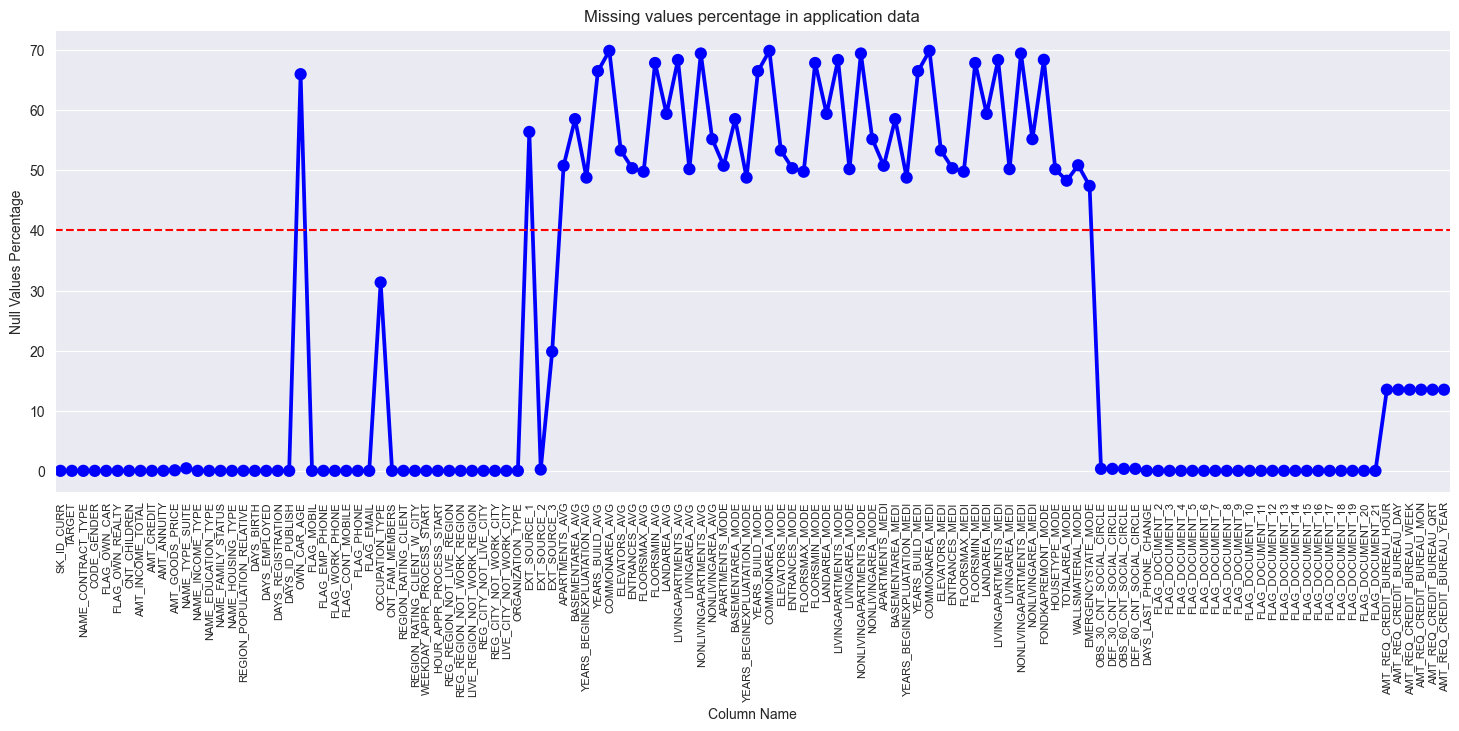

In [20]:
## Plot the graph of missing values percentage
sns.set_style('darkgrid')
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(data=null_application,x='Column Name',y='Null Values Percentage',color='b')
ax.axhline(40,ls='--',color='r')  # It is used to add horizontal line on graph at y=40
plt.xticks(rotation=90,fontsize=8);
plt.title('Missing values percentage in application data');

### Interpretation
From the plot we can see that 
- The columns in which percentage of null values more than 40% are marked above red line.
- The columns which have less than 40% missing values below the red line. 

#### Let's check the columns which has more than 40% missing values

In [21]:
# Check which column contain more than 40% missing values
null_app_40=null_application[null_application['Null Values Percentage']>=40]
null_app_40

Column Name  Null Values Percentage
21                   OWN_CAR_AGE               65.990810
41                  EXT_SOURCE_1               56.381073
44                APARTMENTS_AVG               50.749729
45              BASEMENTAREA_AVG               58.515956
46   YEARS_BEGINEXPLUATATION_AVG               48.781019
47               YEARS_BUILD_AVG               66.497784
48                COMMONAREA_AVG               69.872297
49                 ELEVATORS_AVG               53.295980
50                 ENTRANCES_AVG               50.348768
51                 FLOORSMAX_AVG               49.760822
52                 FLOORSMIN_AVG               67.848630
53                  LANDAREA_AVG               59.376738
54          LIVINGAPARTMENTS_AVG               68.354953
55                LIVINGAREA_AVG               50.193326
56       NONLIVINGAPARTMENTS_AVG               69.432963
57             NONLIVINGAREA_AVG               55.179164
58               APARTMENTS_MODE               50.749729
59             BASEMENTAREA_MODE               58.515956
60  YEARS_BEGINEXPLUATATION_MODE               48.781019
61              YEARS_BUILD_MODE               66.497784
62               COMMONAREA_MODE               69.872297
63                ELEVATORS_MODE               53.295980
64                ENTRANCES_MODE               50.348768
65                FLOORSMAX_MODE               49.760822
66                FLOORSMIN_MODE               67.848630
67                 LANDAREA_MODE               59.376738
68         LIVINGAPARTMENTS_MODE               68.354953
69               LIVINGAREA_MODE               50.193326
70      NONLIVINGAPARTMENTS_MODE               69.432963
71            NONLIVINGAREA_MODE               55.179164
72               APARTMENTS_MEDI               50.749729
73             BASEMENTAREA_MEDI               58.515956
74  YEARS_BEGINEXPLUATATION_MEDI               48.781019
75              YEARS_BUILD_MEDI               66.497784
76               COMMONAREA_MEDI               69.872297
77                ELEVATORS_MEDI               53.295980
78                ENTRANCES_MEDI               50.348768
79                FLOORSMAX_MEDI               49.760822
80                FLOORSMIN_MEDI               67.848630
81                 LANDAREA_MEDI               59.376738
82         LIVINGAPARTMENTS_MEDI               68.354953
83               LIVINGAREA_MEDI               50.193326
84      NONLIVINGAPARTMENTS_MEDI               69.432963
85            NONLIVINGAREA_MEDI               55.179164
86            FONDKAPREMONT_MODE               68.386172
87                HOUSETYPE_MODE               50.176091
88                TOTALAREA_MODE               48.268517
89            WALLSMATERIAL_MODE               50.840783
90           EMERGENCYSTATE_MODE               47.398304

In [22]:
len(null_app_40)

49

#### Interpretation
- Total 49 columns are there which have more than 40% missing values.

## previous data missing values

<Axes: >

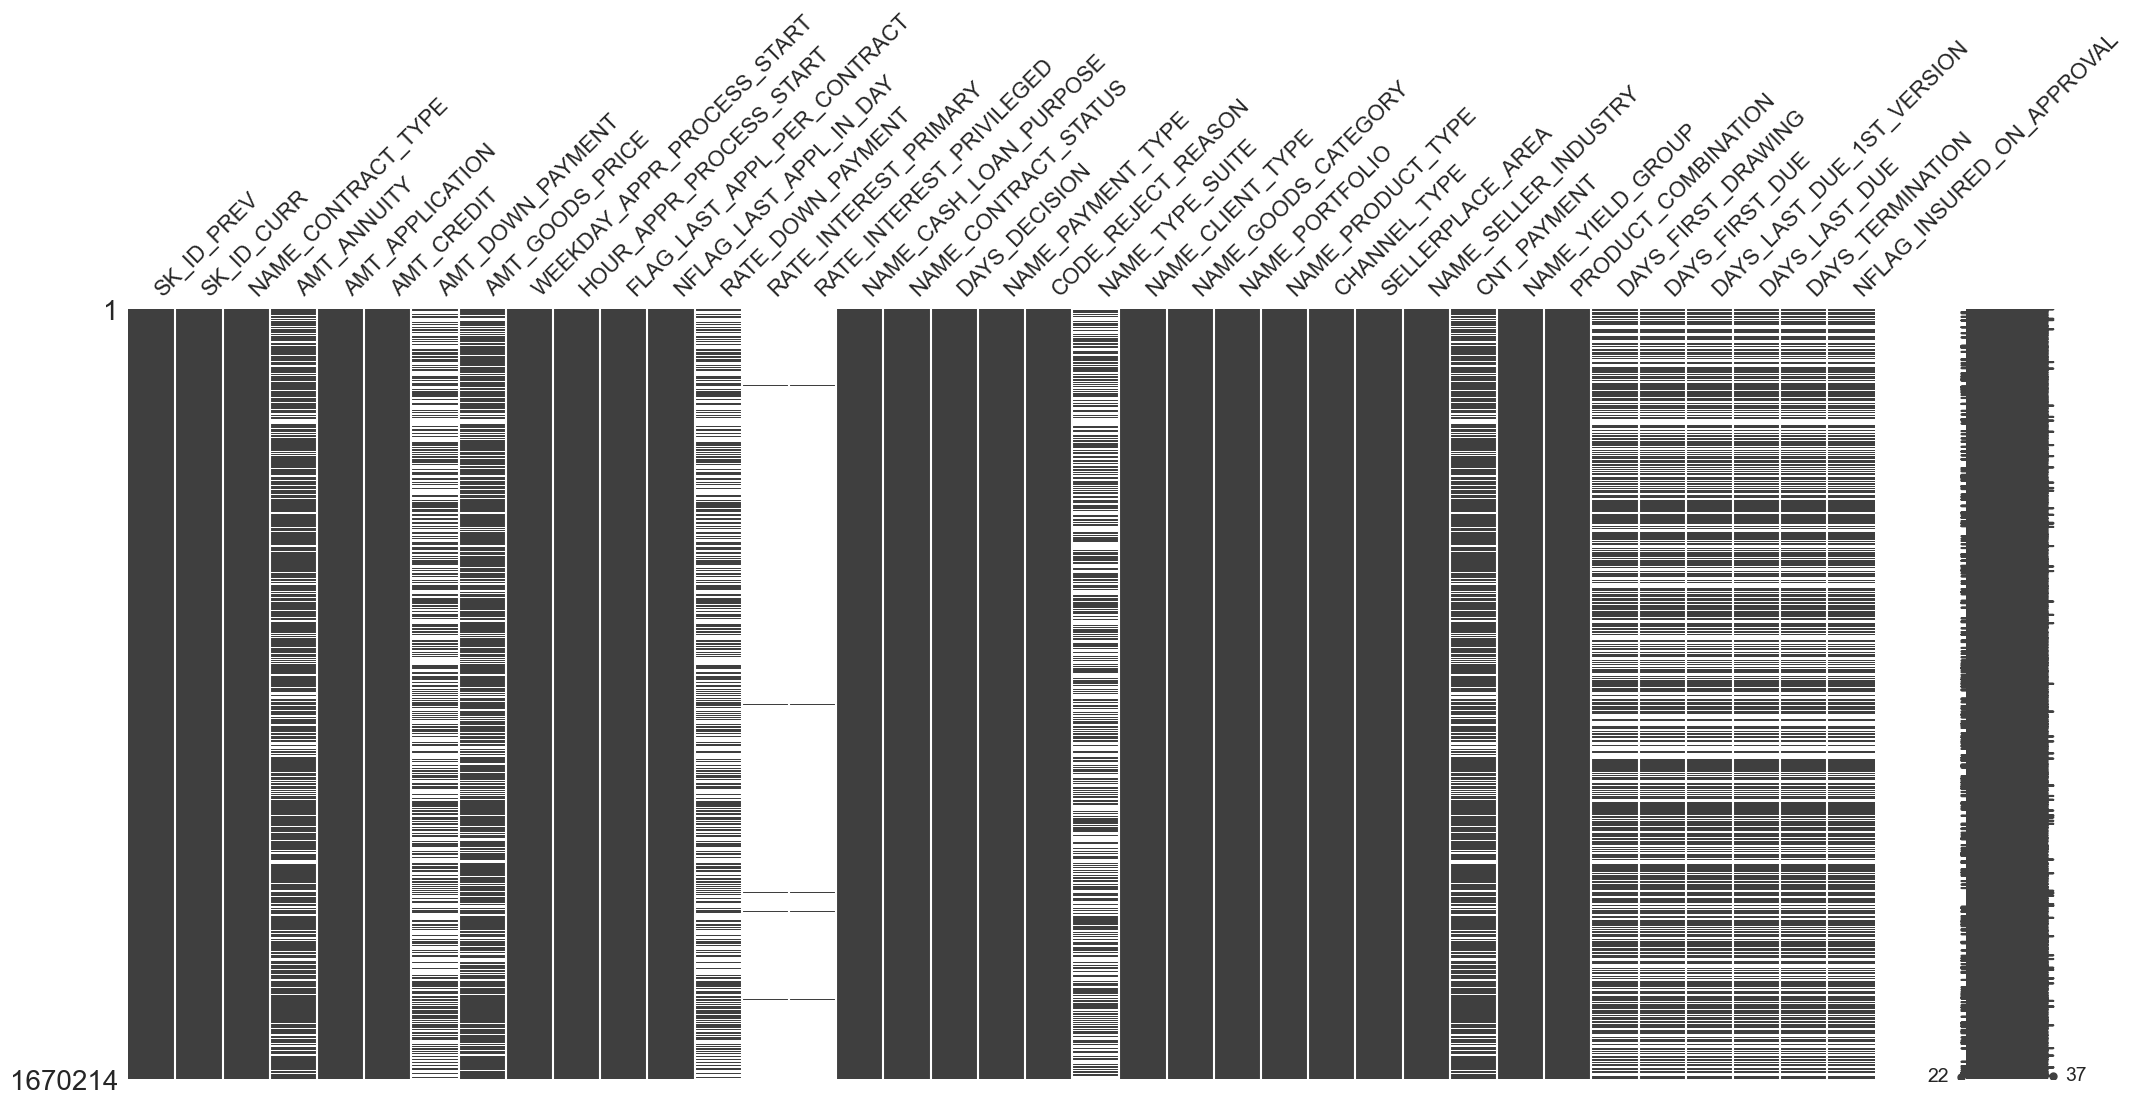

In [23]:
## Missing values matrix for previous data
mn.matrix(previous)

There is many missing value in previous data

#### To find missing values percentage

In [24]:
miss_value=previous.isnull().sum()
total_data=len(previous)

miss_value_per=(miss_value/total_data)*100
miss_value_per

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [25]:
null_previous=pd.DataFrame(miss_value_per.reset_index())
null_previous.columns=['Column Name','Missing Values Percentage']
null_previous

Column Name  Missing Values Percentage
0                    SK_ID_PREV                   0.000000
1                    SK_ID_CURR                   0.000000
2            NAME_CONTRACT_TYPE                   0.000000
3                   AMT_ANNUITY                  22.286665
4               AMT_APPLICATION                   0.000000
5                    AMT_CREDIT                   0.000060
6              AMT_DOWN_PAYMENT                  53.636480
7               AMT_GOODS_PRICE                  23.081773
8    WEEKDAY_APPR_PROCESS_START                   0.000000
9       HOUR_APPR_PROCESS_START                   0.000000
10  FLAG_LAST_APPL_PER_CONTRACT                   0.000000
11       NFLAG_LAST_APPL_IN_DAY                   0.000000
12            RATE_DOWN_PAYMENT                  53.636480
13        RATE_INTEREST_PRIMARY                  99.643698
14     RATE_INTEREST_PRIVILEGED                  99.643698
15       NAME_CASH_LOAN_PURPOSE                   0.000000
16         NAME_CONTRACT_STATUS                   0.000000
17                DAYS_DECISION                   0.000000
18            NAME_PAYMENT_TYPE                   0.000000
19           CODE_REJECT_REASON                   0.000000
20              NAME_TYPE_SUITE                  49.119754
21             NAME_CLIENT_TYPE                   0.000000
22          NAME_GOODS_CATEGORY                   0.000000
23               NAME_PORTFOLIO                   0.000000
24            NAME_PRODUCT_TYPE                   0.000000
25                 CHANNEL_TYPE                   0.000000
26             SELLERPLACE_AREA                   0.000000
27         NAME_SELLER_INDUSTRY                   0.000000
28                  CNT_PAYMENT                  22.286366
29             NAME_YIELD_GROUP                   0.000000
30          PRODUCT_COMBINATION                   0.020716
31           DAYS_FIRST_DRAWING                  40.298129
32               DAYS_FIRST_DUE                  40.298129
33    DAYS_LAST_DUE_1ST_VERSION                  40.298129
34                DAYS_LAST_DUE                  40.298129
35             DAYS_TERMINATION                  40.298129
36    NFLAG_INSURED_ON_APPROVAL                  40.298129

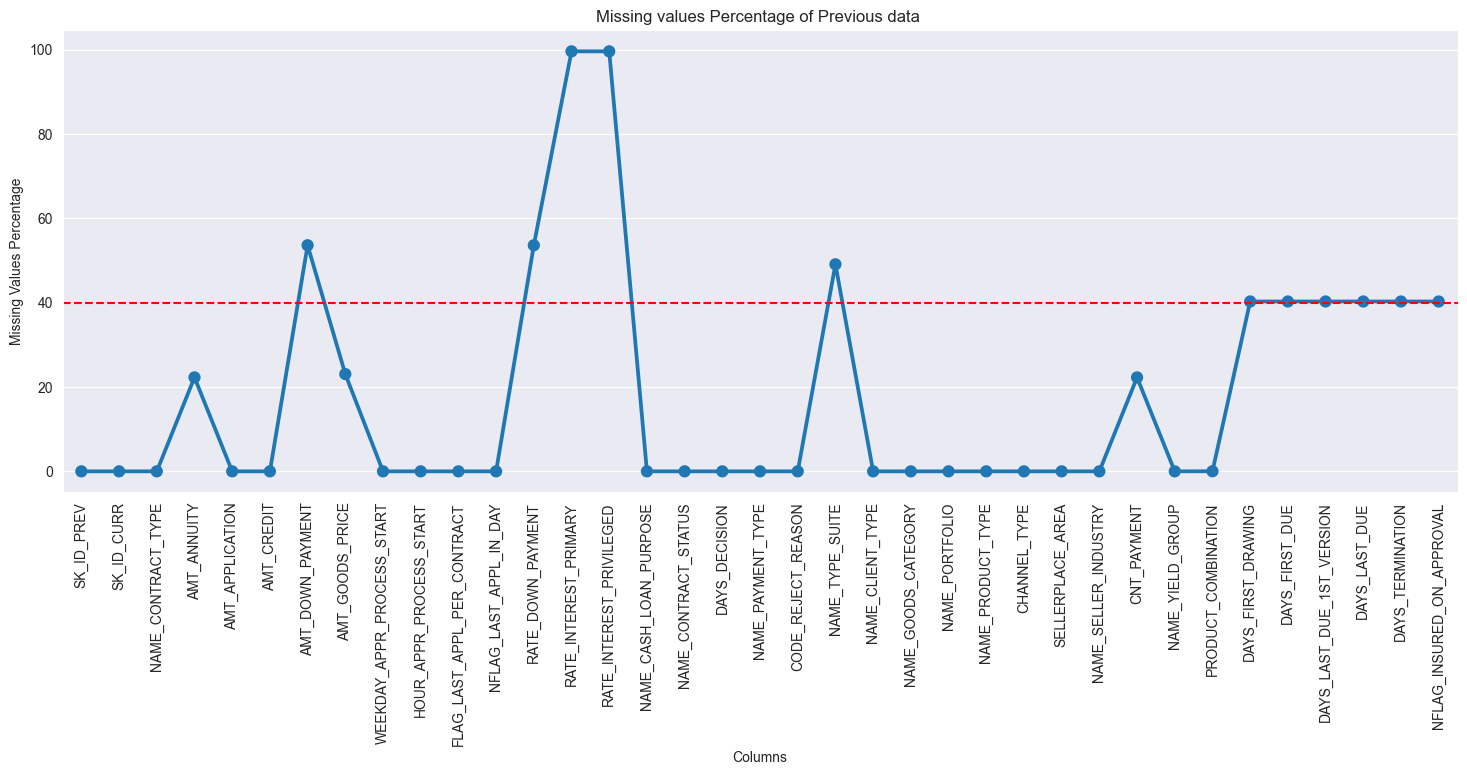

In [26]:
## Missing value percentage graph of previous data
fig=plt.figure(figsize=(18,6))

ax=sns.pointplot(data=null_previous,x='Column Name',y='Missing Values Percentage')
ax.axhline(40,color='r',ls='--')   ## Axis horizontal line at y=40
plt.title('Missing values Percentage of Previous data ')
plt.xlabel('Columns')
plt.xticks(rotation=90,fontsize=10);

#### Interpretation
From the plot we can see that 
- The columns in which percentage of null values more than 40% are marked above red line.
- The columns which have less than 40% missing values below the red line. 

#### To find columns which contain more than 40% missing values 

In [27]:
null_pre_40=null_previous[null_previous['Missing Values Percentage']>=40]
null_pre_40

Column Name  Missing Values Percentage
6            AMT_DOWN_PAYMENT                  53.636480
12          RATE_DOWN_PAYMENT                  53.636480
13      RATE_INTEREST_PRIMARY                  99.643698
14   RATE_INTEREST_PRIVILEGED                  99.643698
20            NAME_TYPE_SUITE                  49.119754
31         DAYS_FIRST_DRAWING                  40.298129
32             DAYS_FIRST_DUE                  40.298129
33  DAYS_LAST_DUE_1ST_VERSION                  40.298129
34              DAYS_LAST_DUE                  40.298129
35           DAYS_TERMINATION                  40.298129
36  NFLAG_INSURED_ON_APPROVAL                  40.298129

In [28]:
len(null_pre_40)

11

- Total 11 columns are there which have more than 40% missing values.

### Checking Correlation

In [29]:
## Analyze & delete unneccesary columns in application data

EXT_SOURCE_X

<Axes: >

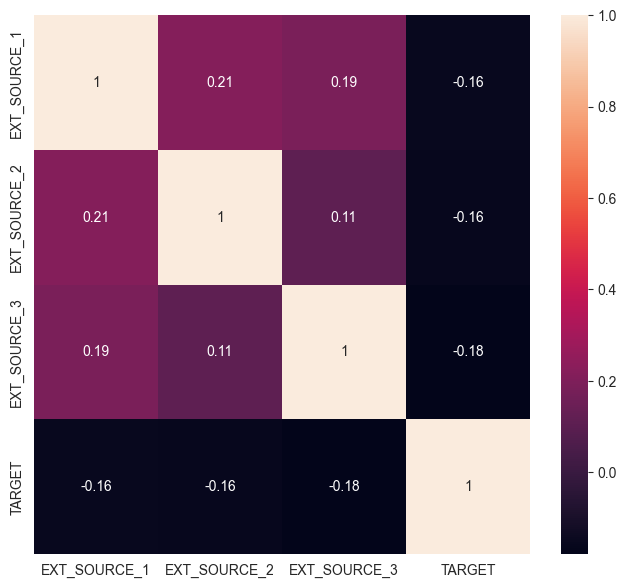

In [30]:
## Correlation graph
plt.subplots(figsize=(8,7))
source=application[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr=source.corr()
sns.heatmap(source_corr,annot=True)


#### Interpretation
- Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. 
- EXT_SOURCE_1 has 56% null values, 
- where as EXT_SOURCE_3 has close to 20% null values

#### Create a list of columns that needs to be droped including columns with >40% null values

In [31]:
unwanted_application=null_app_40['Column Name'].tolist()+['EXT_SOURCE_2','EXT_SOURCE_3']
unwanted_application

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [32]:
len(unwanted_application)

51

### Flag Document
checking the relevance of Flag_Document and whether it has any relation with 'TARGET' variabel (loan repayement status).

In [33]:
doc=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [34]:
flag=application[doc+['TARGET']]
length=len(flag)

In [35]:
flag['TARGET']=flag['TARGET'].replace({1:'Defaulter',0:'Repayer'})

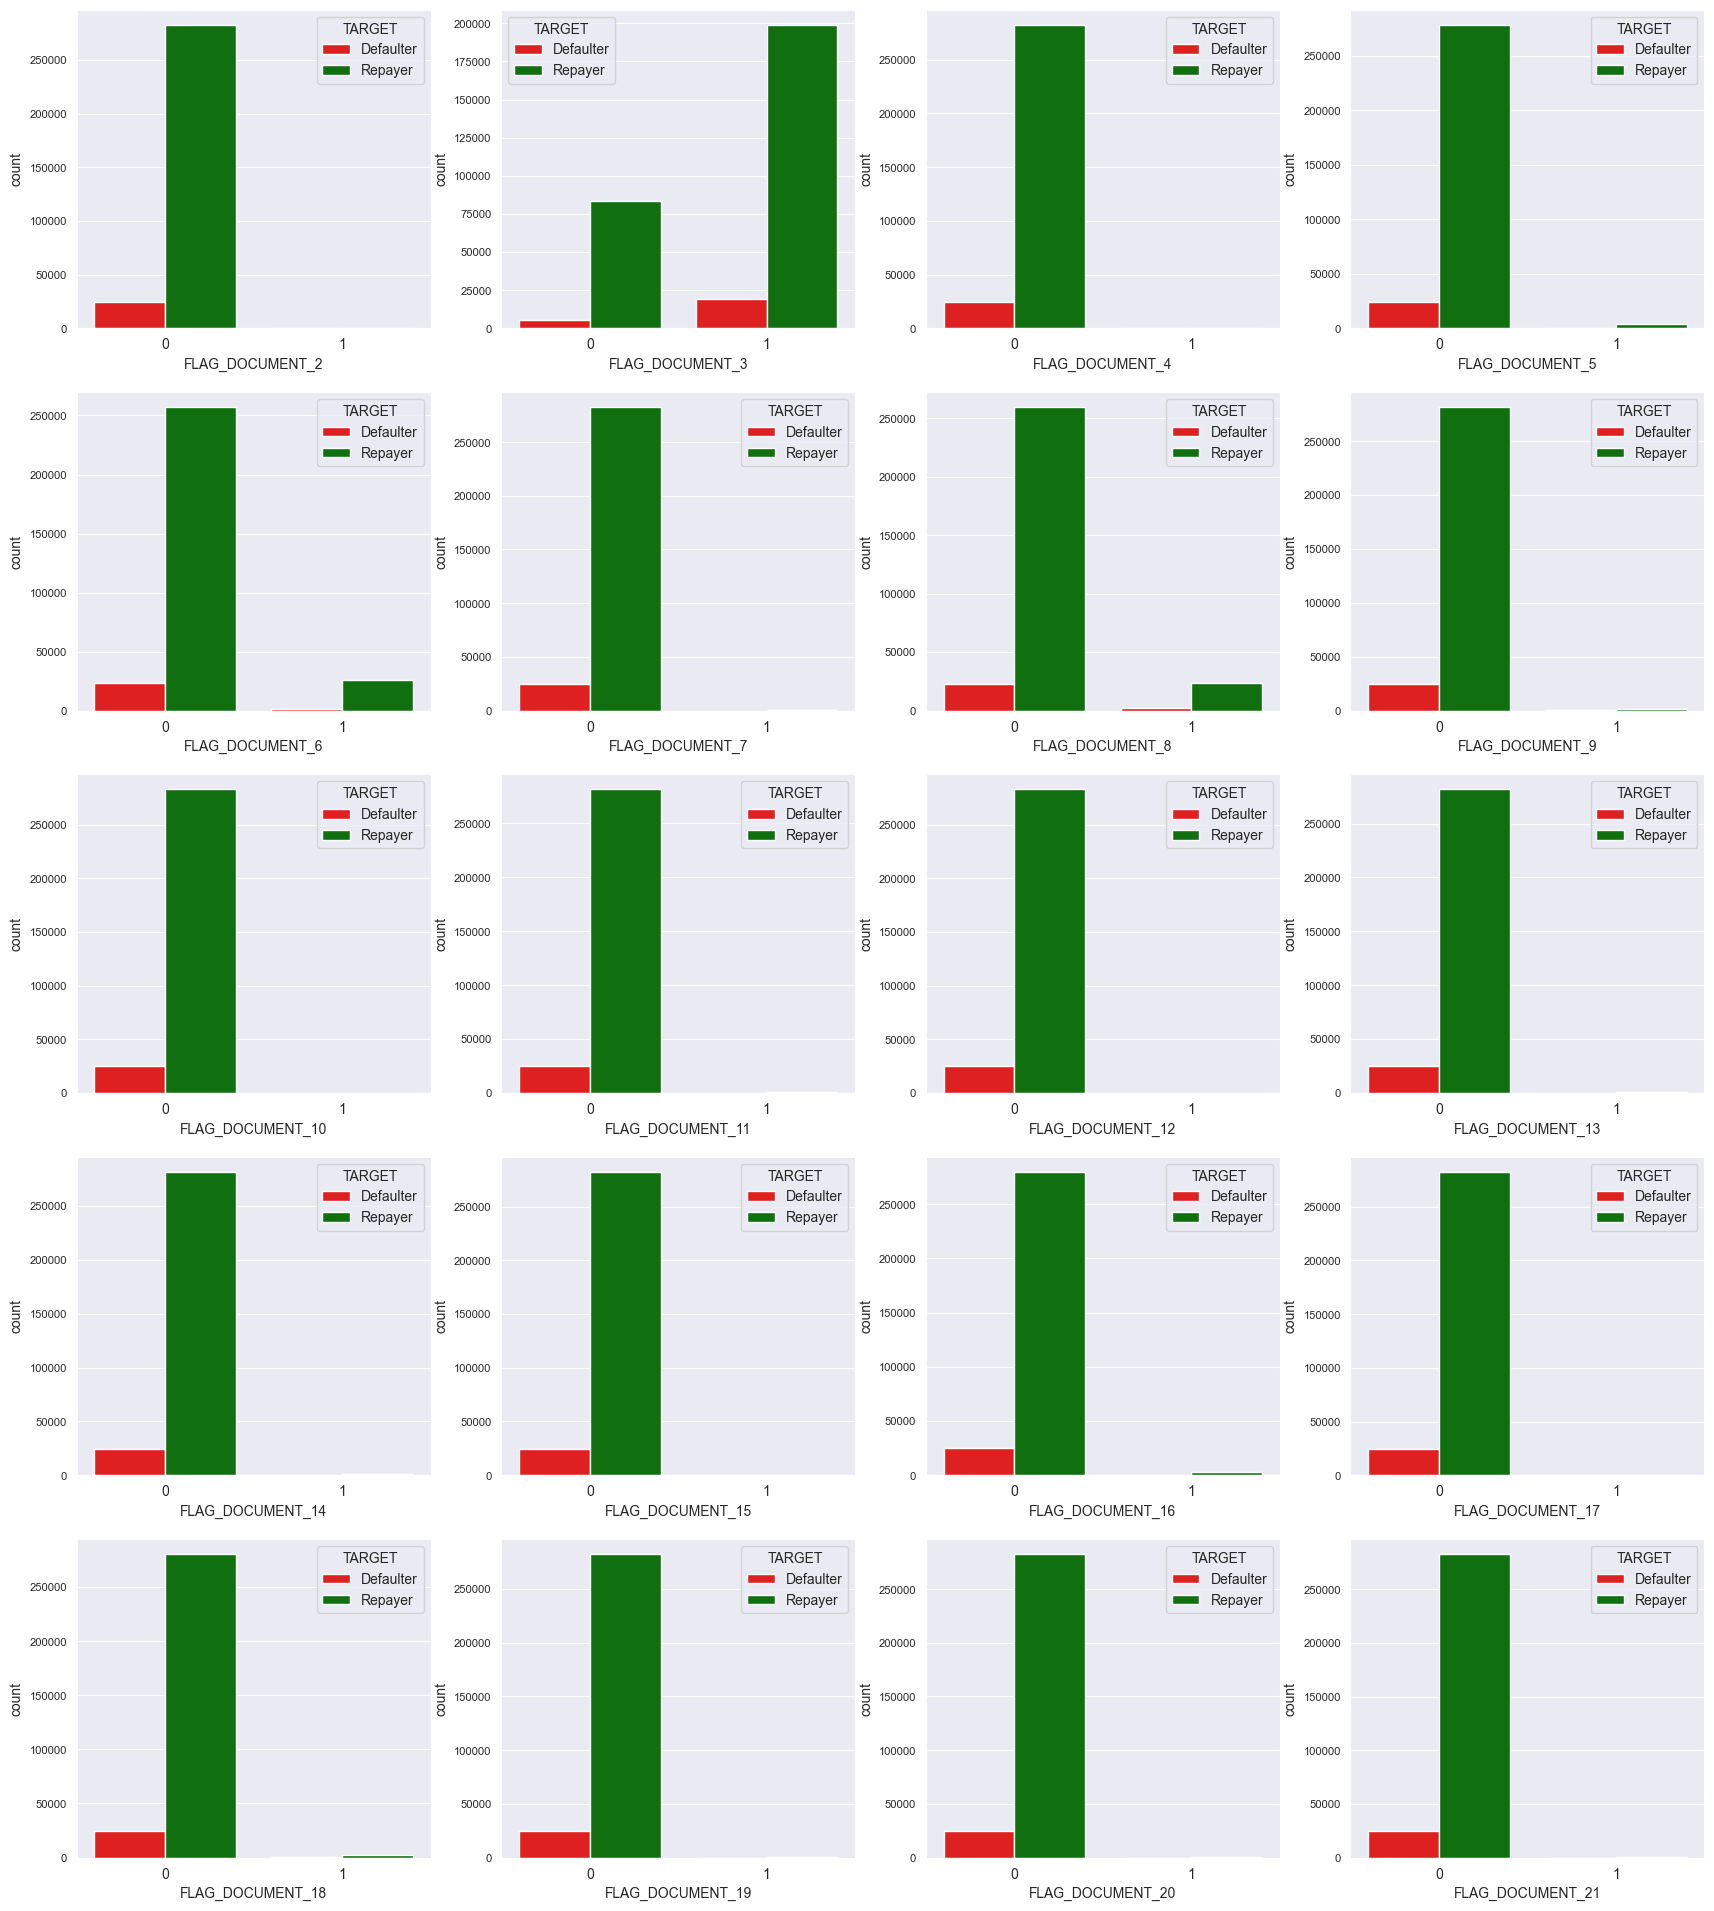

In [36]:
fig=plt.figure(figsize=(21,24))
for j,(col,index)in enumerate(zip(doc,range(length))):
    plt.subplot(5,4,j+1)
    ax=sns.countplot(x=flag[col],hue=flag['TARGET'],palette=['r','g'])
    
    plt.yticks(fontsize=8)
 

#### Interpretation
- From above graph we can say that in most of the loan application cases,cliets not submitted FLAG_DOCUMENT_X (X=2,4,.....21) except FLAG_DOCUMENT_3.
- Thus we can delete rest of the columns
- Data shows if client has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [37]:
# Drop FLAG_DOCUMENT_3 From 'doc' and we delete rest of columns
doc.remove('FLAG_DOCUMENT_3')

In [38]:
doc

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

We removed 'FLAG_DOCUMENT_3' from doc and rest of the columns we delete from datframe.

We add Flag documents column in our unwanted list

In [39]:
unwanted_application=unwanted_application+doc
len(unwanted_application)

70

### Contact Parameters
Checking is there is any correlation between mobile phone, work phone,etc,Email,Family members and Region rating and our 'TARGET' variable.

In [40]:
contact_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
contact_corr=application[contact_col].corr()
contact_corr

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
FLAG_MOBIL          1.000000       -0.000845         0.000900   
FLAG_EMP_PHONE     -0.000845        1.000000         0.233801   
FLAG_WORK_PHONE     0.000900        0.233801         1.000000   
FLAG_CONT_MOBILE   -0.000078       -0.012819         0.021580   
FLAG_PHONE          0.001128       -0.016131         0.293105   
FLAG_EMAIL          0.000442        0.062542        -0.011520   
TARGET              0.000534        0.045982         0.028524   

                  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL    TARGET  
FLAG_MOBIL               -0.000078    0.001128    0.000442  0.000534  
FLAG_EMP_PHONE           -0.012819   -0.016131    0.062542  0.045982  
FLAG_WORK_PHONE           0.021580    0.293105   -0.011520  0.028524  
FLAG_CONT_MOBILE          1.000000    0.006257   -0.005356  0.000370  
FLAG_PHONE                0.006257    1.000000    0.014657 -0.023806  
FLAG_EMAIL               -0.005356    0.014657    1.000000 -0.001758  
TARGET                    0.000370   -0.023806   -0.001758  1.000000

Plot the graph of correlation

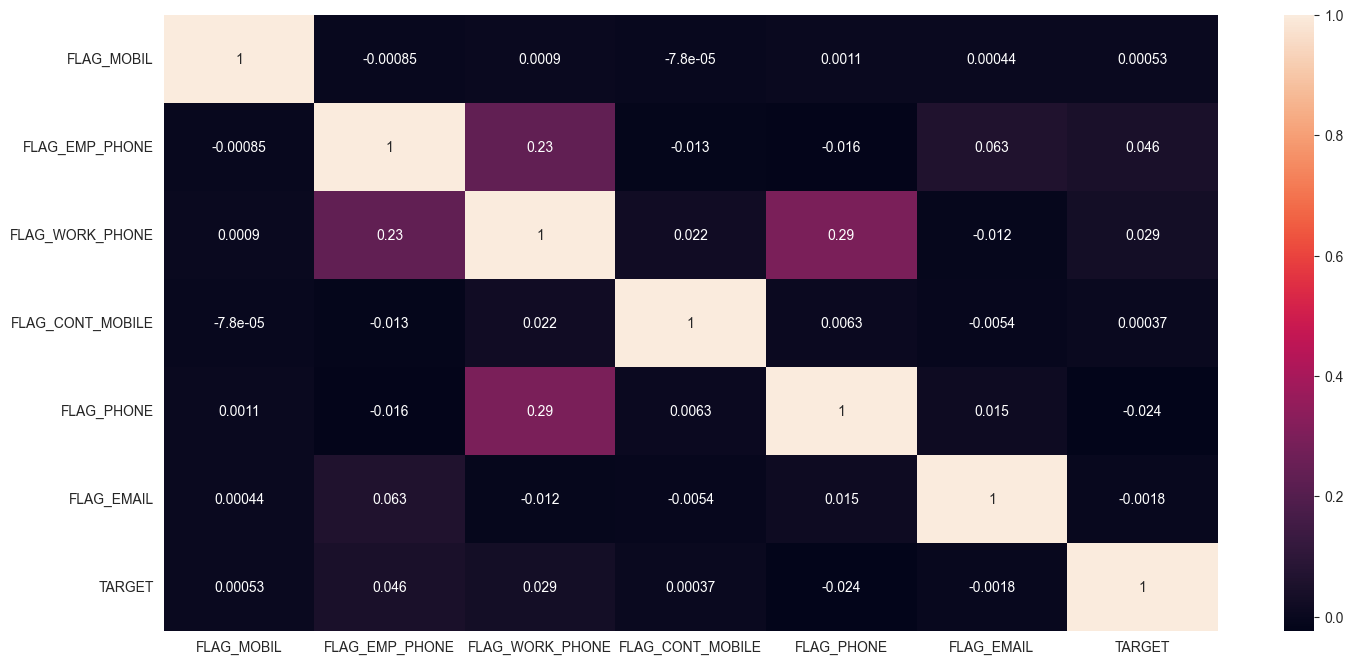

In [41]:
fig=plt.figure(figsize=(17,8))

ax=sns.heatmap(contact_corr,annot=True)

#### Interpretation
There is no correlation between flags of mobile phone, email  etc with loan repayment, thus these columns can be deleted

In [42]:
## Including the 6 FLAG columns to be deleted
contact_col.remove('TARGET')

In [43]:
unwanted_application=unwanted_application+contact_col
len(unwanted_application)

76

#### Total 76 columns can be deleted

In [44]:
application.drop(labels=unwanted_application,axis=1,inplace=True)

In [45]:
application.shape

(307511, 46)

In [46]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Interpretation
After deleting unnecessary columns,there are 46 columns remaining in appication dataset. 

### Analyze & Delete Unnecessary Columns in 'Previous' dataset 

In [47]:
previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [48]:
## List that columns whose missing values percentage is grater than 40% and delete that columns from dataset
unwanted_previous=null_pre_40['Column Name'].to_list()
len(unwanted_previous)

11

In [49]:
# Listing down columns which are not needed

unnecessary_previous=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']


In [50]:
unwanted_previous=unwanted_previous+unnecessary_previous
len(unwanted_previous)

15

Total 15 columns can be deleted

In [51]:
## Droping the unnesessary columns from previous dataset

previous.drop(labels=unwanted_previous,axis=1,inplace=True)


In [52]:
previous.head(2)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   

   DAYS_DECISION  ... NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0            -73  ...         Repeater              Mobile            POS   
1           -164  ...         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE    CHANNEL_TYPE SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0               XNA    Country-wide               35         Connectivity   
1            x-sell  Contact center               -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  

[2 rows x 22 columns]

In [53]:
previous.shape

(1670214, 22)

In [54]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

After removing the unwanted columns 22 columns are remaining.

#### Strategy for previous dataset
- Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.
- Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns
- Categorize the amount variables into bins
- Convert region rating column and few other columns to categorical

### Converting Negative days to positive days
- In Days columns we have negative entries but days cannot be negative. 
- so we convert negative days into positive days. 

In [55]:
date_col=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

for col in date_col:
    application[col]=abs(application[col])

In [56]:
application[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   
307510       16856           1262             5128.0              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                        815.0  
3                        617.0  
4                       1106.0  
...                        ...  
307506                   273.0  
307507                     0.0  
307508                  1909.0  
307509                   322.0  
307510                   787.0  

[307511 rows x 5 columns]

We convert negative dates column into positive.

### Binning Numerical Columns to create a categorical column

### Creating bins for income amount

In [57]:
application.AMT_INCOME_TOTAL=application.AMT_INCOME_TOTAL/100000

bins=[0,1,2,3,4,5,6,7,8,9,10,11]
slot=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M','1M Above']

application.AMT_INCOME_RANGE=pd.cut(application.AMT_INCOME_TOTAL,bins,labels=slot)

In [58]:
application.AMT_INCOME_RANGE.value_counts(normalize=True)*100

AMT_INCOME_TOTAL
100k-200k    50.735000
200k-300k    21.210691
0-100k       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

### Interpretaion
- More than 50% loan applicants have income amount in the range of 100k-200k.
- Almost 92% loan applicants have income less than 300k. 

### Creating bins for Credit amount

In [59]:
application.AMT_CREDIT=application.AMT_CREDIT/100000

In [60]:
bins=[0,1,2,3,4,5,6,7,8,9,10,100]
slots=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M','1M-Above']
application['AMT_CREDIT_RANGE']=pd.cut(application.AMT_CREDIT,bins=bins,labels=slots)

In [61]:
application['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M-Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100k-200k     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100k        1.952450
Name: proportion, dtype: float64

### Interpretation
More than 16% loan applicants have taken loan which amounts to more than 1M.

### Creating Bins for Age

In [62]:
application['AGE']=application.DAYS_BIRTH//365
bins=[0,20,30,40,50,100]
slots=['0-20','20-30','30-40','40-50','50 Above']

In [63]:
application['AGE_GROUP']=pd.cut(application.AGE,bins=bins,labels=slots)

In [64]:
## Checking the binning of data and % of data in each category
application.AGE_GROUP.value_counts(normalize=True)*100

AGE_GROUP
50 Above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

#### Interpretation
- 31% loan applicants have age above 50 years.
- More than 55% of loan applicants have age below 40 years.

### Creating bins for Employement Time

In [65]:
application['YEARS_EMPLOYED']=application.DAYS_EMPLOYED//365

bins=[0,5,10,20,30,40,50,60,150]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 Above']



In [66]:
application['EMPLOYMENT_YEAR']=pd.cut(application.YEARS_EMPLOYED,bins=bins,labels=slots)

In [67]:
## Checking the binning of data and % of data in each category

application.EMPLOYMENT_YEAR.value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 Above     0.000000
Name: proportion, dtype: float64

#### Interpretation
- More than 55% of the loan applicants have work experience within 0-5 years.
- Almost 80% of them have less than 10 years of work experience.

#### Checking the number of unique values each  column posses to identify categorical columns

In [68]:
application.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

### DataType Conversion

In [69]:
# Inspecting the column types if they are in correct data type using the above result.

In [70]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Numeric columns are already in 'int' and 'float' format.

###  Conversion of object and numerical columns to categorical columns.

In [71]:
categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY']

for col in categorical_columns:
    application[col]=pd.Categorical(application[col])
    

In [72]:
## Cheking column type is converted or not

application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### Standardize Values for previous dataframe

#### Strategy for previous dataframe
- convert DAYS_DECISION from negative to positive values and create categorical bins columns.
- Convert loan purpose and few other columns to categorical

In [73]:
# Checking the number of unique values each column posses to identify categorical columns

previous.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [74]:
# Checking the column type 
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [75]:
## Converting Negative days to Positive days
previous['DAYS_DECISION']=abs(previous.DAYS_DECISION)

In [76]:
previous.DAYS_DECISION

0            73
1           164
2           301
3           512
4           781
           ... 
1670209     544
1670210    1694
1670211    1488
1670212    1185
1670213    1193
Name: DAYS_DECISION, Length: 1670214, dtype: int64

Convert negative days into positive days

In [77]:
# Age group calculation e.g 388 will be grouped as 300-400

data=previous.DAYS_DECISION
previousDF=pd.DataFrame(data)

In [78]:
previousDF

DAYS_DECISION
0                   73
1                  164
2                  301
3                  512
4                  781
...                ...
1670209            544
1670210           1694
1670211           1488
1670212           1185
1670213           1193

[1670214 rows x 1 columns]

In [79]:
# Calculate DAYS_DECISION_GROUP
previous['DAYS_DECISION_GROUP'] = ((previousDF['DAYS_DECISION'] // 400) * 400).astype(str) + '-' + (
    ((previousDF['DAYS_DECISION'] // 400) + 1) * 400).astype(str)

In [80]:
# Calculate value counts as percentages
previous['DAYS_DECISION_GROUP'].value_counts(normalize=True) * 100


DAYS_DECISION_GROUP
0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: proportion, dtype: float64

#### Interpretation
- Almost 37% loan applicants have applied for new loan within 0-400 days of previous loan decision.

In [81]:
# Converting categorical columns from object to categorical

In [82]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [83]:
category_col_pre=['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in category_col_pre:
    previous[col]=pd.Categorical(previous[col])


In [84]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

## Null Value Data Imputation

### Imputing Null Values in application dataset

In [85]:
## Checking the null value % of each column in application dataframe 

In [86]:
app_miss_value=application.isnull().sum()
total_data=len(application)

In [87]:
app_miss_per=(app_miss_value/total_data)*100
round(app_miss_per,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage i.e 0.42% with the most frequent category using mode()[0]

In [88]:
application.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [89]:
application['NAME_TYPE_SUITE'].fillna(application['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [90]:
application['NAME_TYPE_SUITE'].isnull().any()

False

In [91]:
application['NAME_TYPE_SUITE'].isnull().sum()

0

     There is no null values in NAME_TYPE_SUITE

#### Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage (31.35%) with a new category as assigning to any existing category might influence the analysis.

In [92]:
application.OCCUPATION_TYPE.unique()

['Laborers', 'Core staff', 'Accountants', 'Managers', NaN, ..., 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff']
Length: 19
Categories (18, object): ['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', ..., 'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff']

In [93]:
application.OCCUPATION_TYPE.isnull().sum()

96391

In [94]:
application.OCCUPATION_TYPE=application.OCCUPATION_TYPE.cat.add_categories('Unknown')
application.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

In [95]:
application.OCCUPATION_TYPE.isnull().sum()

0

There is no null values in OCCPATION_TYPE.

#### Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:

In [96]:
application[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

### Impute with median as mean has decimals and this is number of requests



In [97]:
amount=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [98]:
for col in amount:
    application[col].fillna(application[col].median(),inplace=True)

In [99]:
amount=application[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

In [100]:
amount

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

### Checking the null value % of each column in application dataframe

In [101]:
round((application.isnull().sum()/len(application))*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

#### Interpretation
- We still have few null values in the columns AMT_GOODS_PRICE(0.09),OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE(0.33),EMPLOYMENT_YEAR (27.08)
- Null value percentage is very less we ignore that.

### Imputing Null Values in Previous Dataframe

In [102]:
# Checking the null values % of each column in Previous Dataframe

round(previous.isnull().sum()/len(previous)*100,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

### Impute AMT_ANNUITY with median as the distribution is greatly skewed:



<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

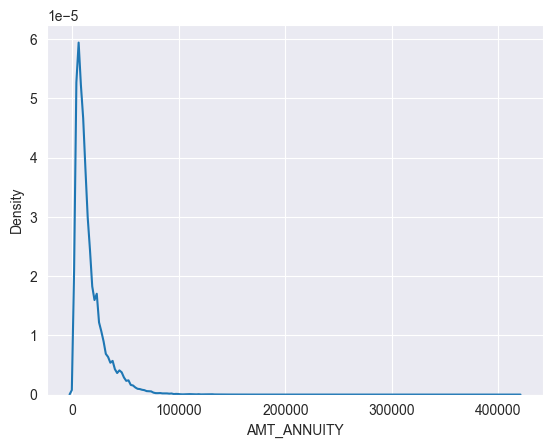

In [103]:
sns.kdeplot(previous.AMT_ANNUITY)

#### Interpretation
- The Graph of AMT_ANNUITY is Postively Skewed.
- Mean > Median > Mode
- The median is often a better measure of central tendency than the mean for positively skewed data, as it is less affected by extreme values.
- Imputing with median is better than mean.

In [104]:
previous['AMT_ANNUITY'].fillna(previous['AMT_ANNUITY'].median(),inplace=True)

### Impute AMT_GOODS_PRICE with mode as the distribution is closely similar:



<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

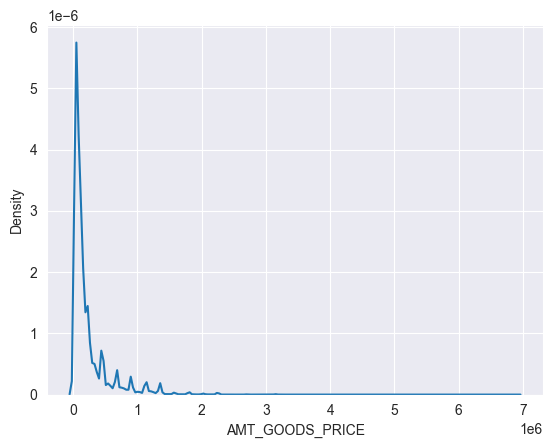

In [105]:
sns.kdeplot(previous['AMT_GOODS_PRICE'][pd.notnull(previous['AMT_GOODS_PRICE'])])

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

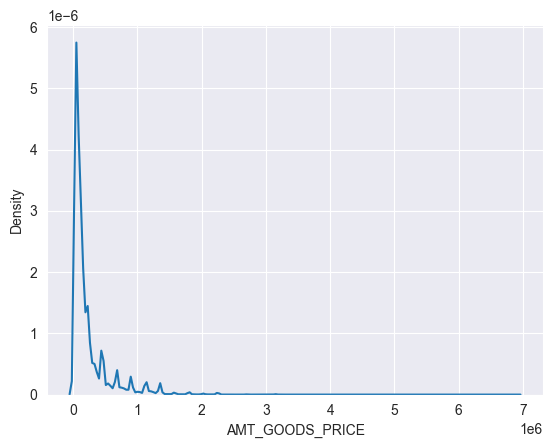

In [106]:
sns.kdeplot(previous.AMT_GOODS_PRICE)

There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.

### New dataframe to imput values mode,median & Mean in AMT_GOODS_PRICE

In [107]:
# New dataframe with columns imputed with mode,median and mean 
statsDF=pd.DataFrame()

statsDF['AMT_GOODS_PRICE_mode']=previous.AMT_GOODS_PRICE.fillna(previous['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median']=previous.AMT_GOODS_PRICE.fillna(previous['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean']=previous.AMT_GOODS_PRICE.fillna(previous['AMT_GOODS_PRICE'].mean())
cols=['AMT_GOODS_PRICE_mode','AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

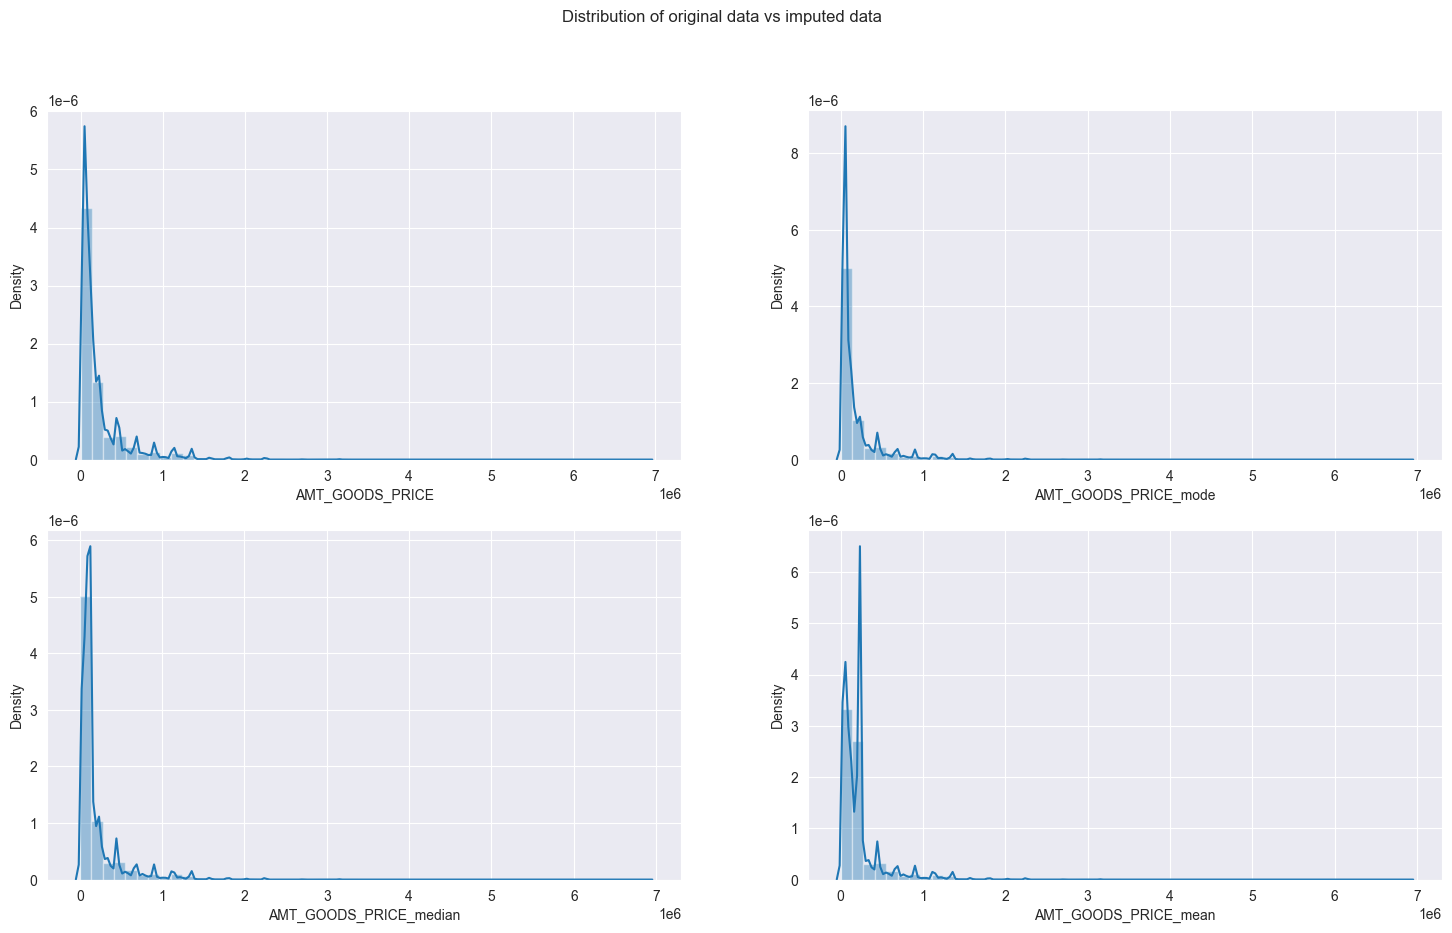

In [108]:
plt.figure(figsize=(18,10))
plt.suptitle('Distribution of original data vs imputed data')
plt.subplot(221)
sns.distplot(previous['AMT_GOODS_PRICE'][pd.notnull(previous.AMT_GOODS_PRICE)])
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

#### Interpretation
The original distribution is closer with the distribution of data imputed with mode in this case.

In [109]:
## Fill null values of 'AMT_GOODS_PRICE' column with mode
previous['AMT_GOODS_PRICE'].fillna(previous.AMT_GOODS_PRICE.mode()[0],inplace=True)
previous['AMT_GOODS_PRICE']

0           17145.0
1          607500.0
2          112500.0
3          450000.0
4          337500.0
             ...   
1670209    267295.5
1670210     87750.0
1670211    105237.0
1670212    180000.0
1670213    360000.0
Name: AMT_GOODS_PRICE, Length: 1670214, dtype: float64

#### Impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started

In [110]:
previous.loc[previous['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [111]:
previous.CNT_PAYMENT.fillna(0,inplace=True)

In [112]:
## Checking the null value percentage of previous dataframe

round(previous.isnull().sum()/len(previous)*100,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

#### Insights
- We still have few null values in the PRODUCT_COMBINATION column.
- We can ignore as this percentage is very less

### Identifying the outliers

 Finding outlier information in application dataframe 

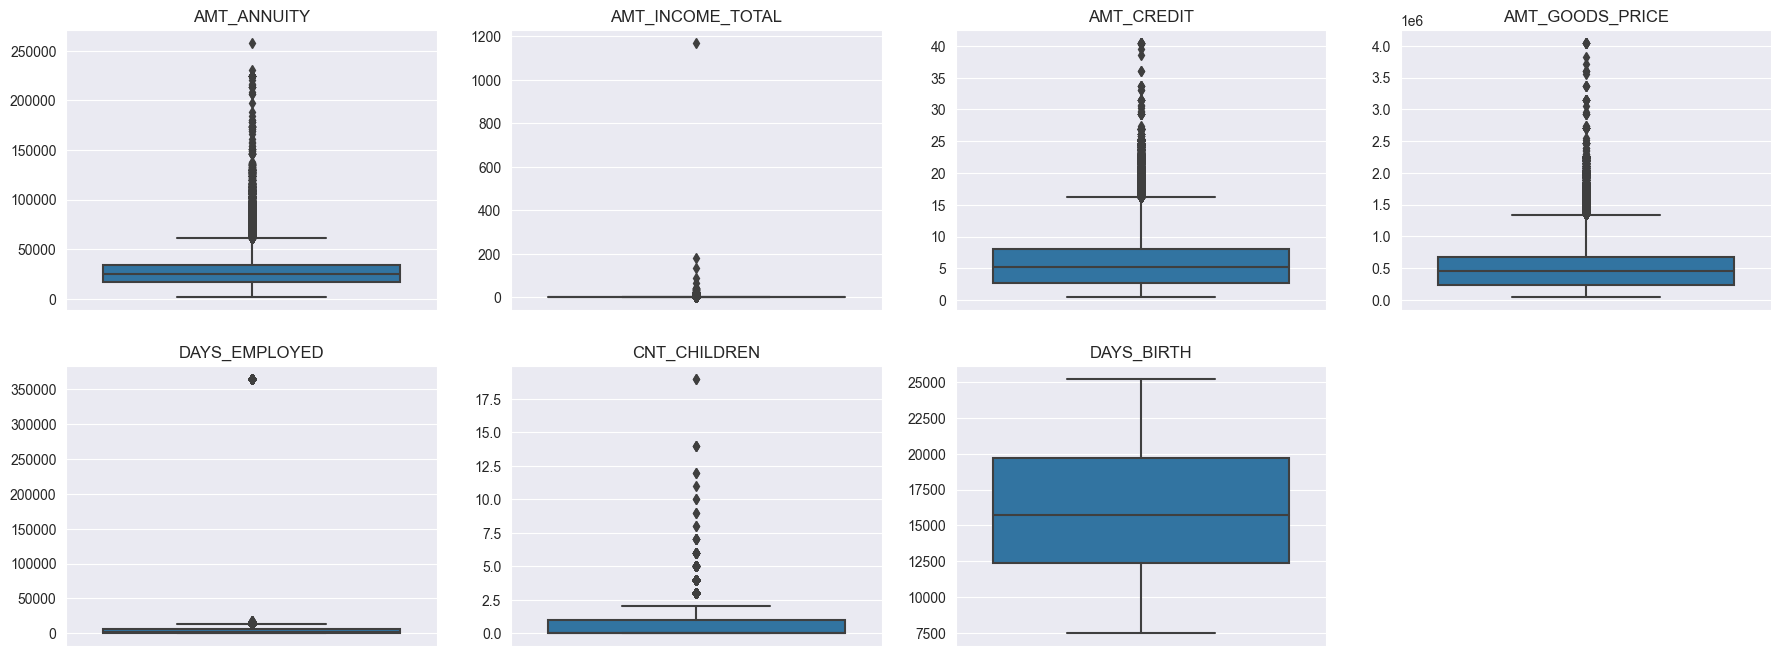

In [113]:
plt.figure(figsize=(22,8))
app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']

for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application[i[1]])
    plt.title(i[1])
    plt.ylabel('')
    
for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application[i[1]])
    plt.title(i[1])
    plt.ylabel('')    

#### Insight
##### It can be seen that in current application data
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
- AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
- DAYS_BIRTH has no outliers which means the data available is reliable.
- DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.

In [114]:
# We can see the stats for these columns below as well.

application[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE  \
count  307499.000000     307511.000000  307511.000000     3.072330e+05   
mean    27108.573909          1.687979       5.990260     5.383962e+05   
std     14493.737315          2.371231       4.024908     3.694465e+05   
min      1615.500000          0.256500       0.450000     4.050000e+04   
25%     16524.000000          1.125000       2.700000     2.385000e+05   
50%     24903.000000          1.471500       5.135310     4.500000e+05   
75%     34596.000000          2.025000       8.086500     6.795000e+05   
max    258025.500000       1170.000000      40.500000     4.050000e+06   

          DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED  
count  307511.000000  307511.000000  307511.000000  
mean    16036.995067       0.417052   67724.742149  
std      4363.988632       0.722121  139443.751806  
min      7489.000000       0.000000       0.000000  
25%     12413.000000       0.000000     933.000000  
50%     15750.000000       0.000000    2219.000000  
75%     19682.000000       1.000000    5707.000000  
max     25229.000000      19.000000  365243.000000

#### Finding outlier information in previous dataframe

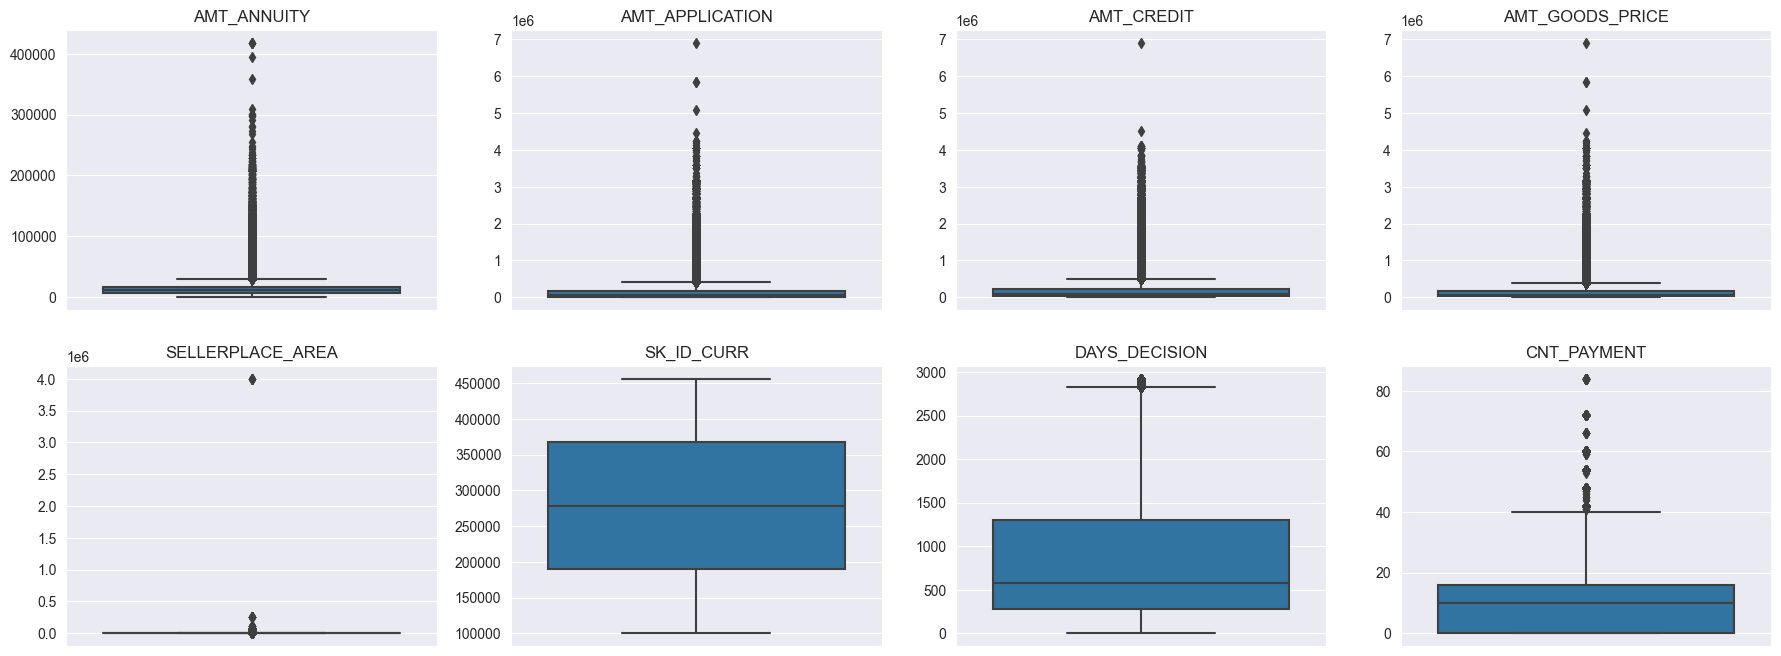

In [115]:
plt.figure(figsize=(22,8))
prev_oulier_col_1=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2=['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

for i in enumerate(prev_oulier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous[i[1]])
    plt.title(i[1])
    plt.ylabel('')
    
for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previous[i[1]])
    plt.title(i[1])
    plt.ylabel('')


#### Insight: It can be seen that in previous application data
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
- CNT_PAYMENT has few outlier values.
- SK_ID_CURR is an ID column and hence no outliers.
- DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.


In [116]:
previous[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06   
mean   1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05   
std    1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04   
50%    1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04   
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05   
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION  
count      1.670214e+06  1.670214e+06   1.670214e+06  
mean       3.139511e+02  1.247621e+01   8.806797e+02  
std        7.127443e+03  1.447588e+01   7.790997e+02  
min       -1.000000e+00  0.000000e+00   1.000000e+00  
25%       -1.000000e+00  0.000000e+00   2.800000e+02  
50%        3.000000e+00  1.000000e+01   5.810000e+02  
75%        8.200000e+01  1.600000e+01   1.300000e+03  
max        4.000000e+06  8.400000e+01   2.922000e+03

## 5) Data Analysis

###  Imbalance Analysis

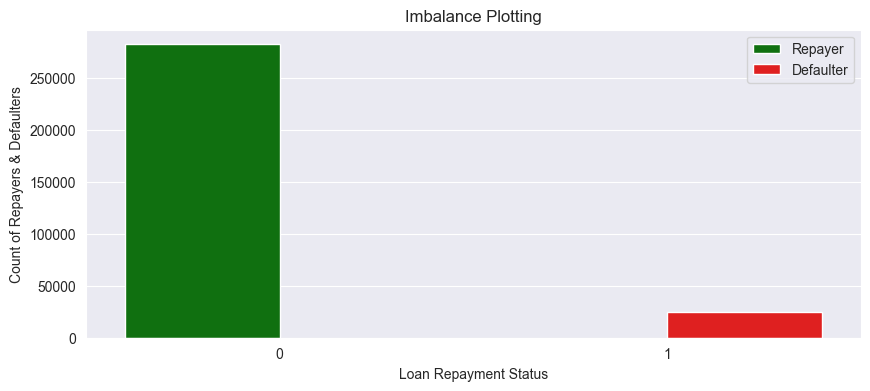

In [117]:
Imbalance = application["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))

sns.barplot(x="TARGET",y='count',data = Imbalance,palette= ['g','r'],hue=['Repayer','Defaulter'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [118]:
Imbalance

TARGET   count
0       0  282686
1       1   24825

In [119]:
count_0=Imbalance.iloc[0]['count']
count_1=Imbalance.iloc[1]['count']
total_counts=count_0+count_1

count_0_per=count_0/total_counts*100
count_1_per=count_1/total_counts*100

print(f'Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: {count_0_per:.2f}% and {count_1_per:.2f}%')
print(f'Ratios of imbalance in relative with respect to Repayer and Defaulter datas is {count_0 / count_1:.2f} : 1 (approx)')


Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93% and 8.07%
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


### Plotting Functions

In [120]:
# function for plotting repetitive countplots in univariate categorical analysis on application
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = application[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=application,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [121]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [122]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on application

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=application, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [123]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [124]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

## Categorical Variable Analysis

### Segmented Univariate Analysis

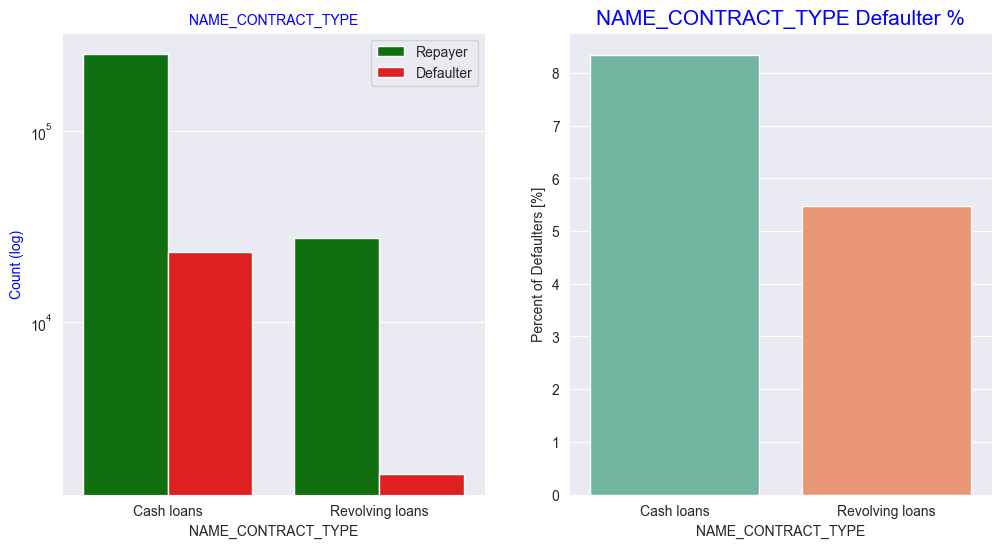

In [125]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)


## Interpretation
**Contract type:** Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

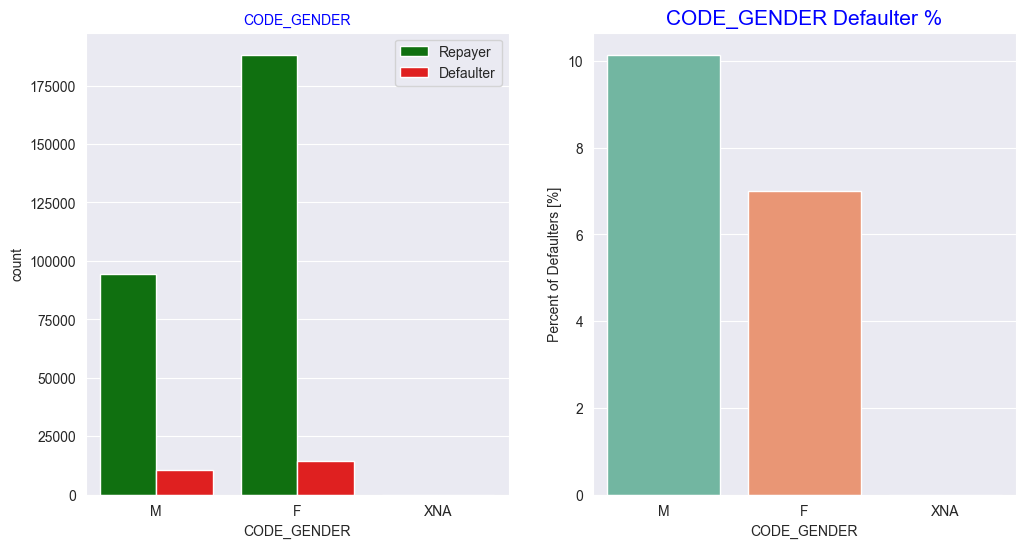

In [126]:
# Checking the type of Gender on Loan repayment status
univariate_categorical('CODE_GENDER')

## Interpretation
- The number of female clients is almost double the number of male clients. 
- Based on the percentage of defaulted credits, males have a higher chance of not returning their loans **(~10%)**, comparing with women **(~7%)**.

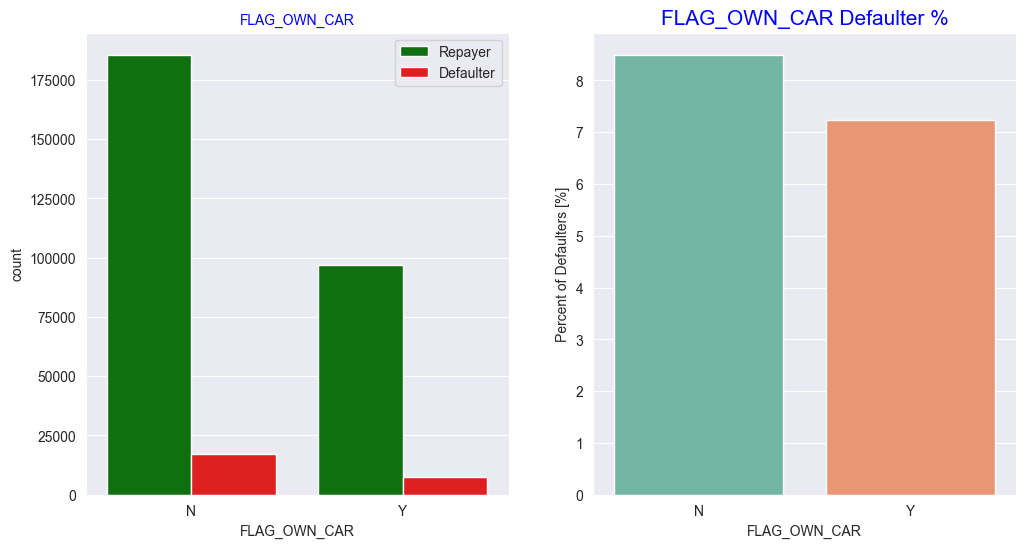

In [127]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

### Inferences:
- Clients who own a car are half in number of the clients who dont own a car. 
- But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

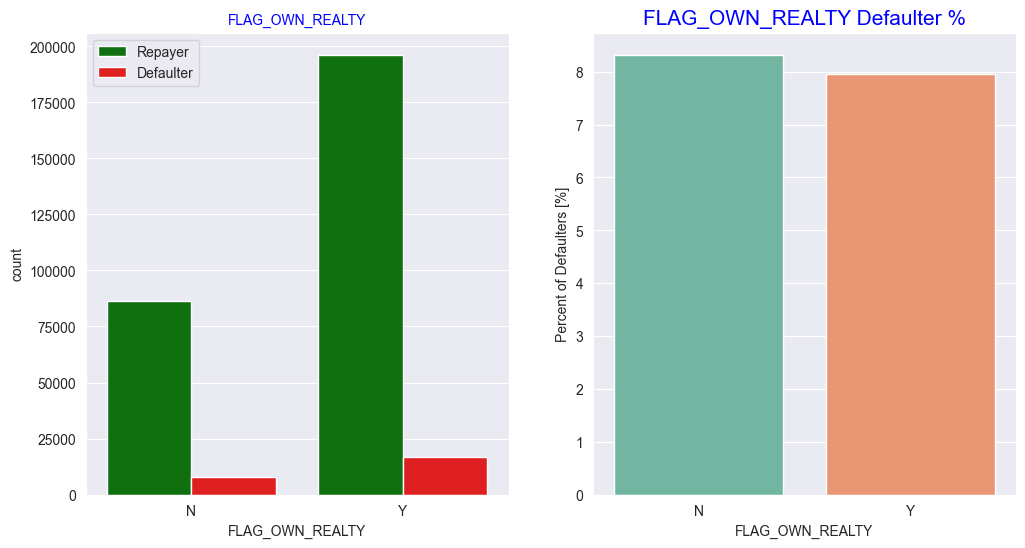

In [128]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

### Inferences:
- The clients who own real estate are more than double of the ones that don't own. 
- But the defaulting rate of both categories are around the same (~8%). 
- Thus there is no correlation between owning a reality and defaulting the loan.

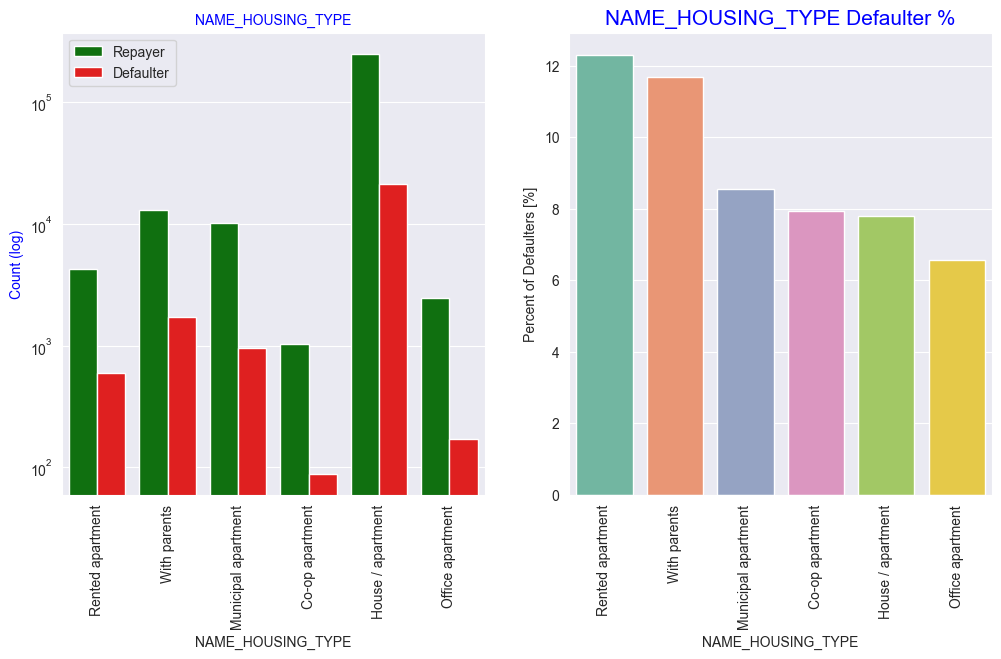

In [129]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

### Inferences:
- Majority of people live in House/apartment
- People living in office apartments have lowest default rate
- People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

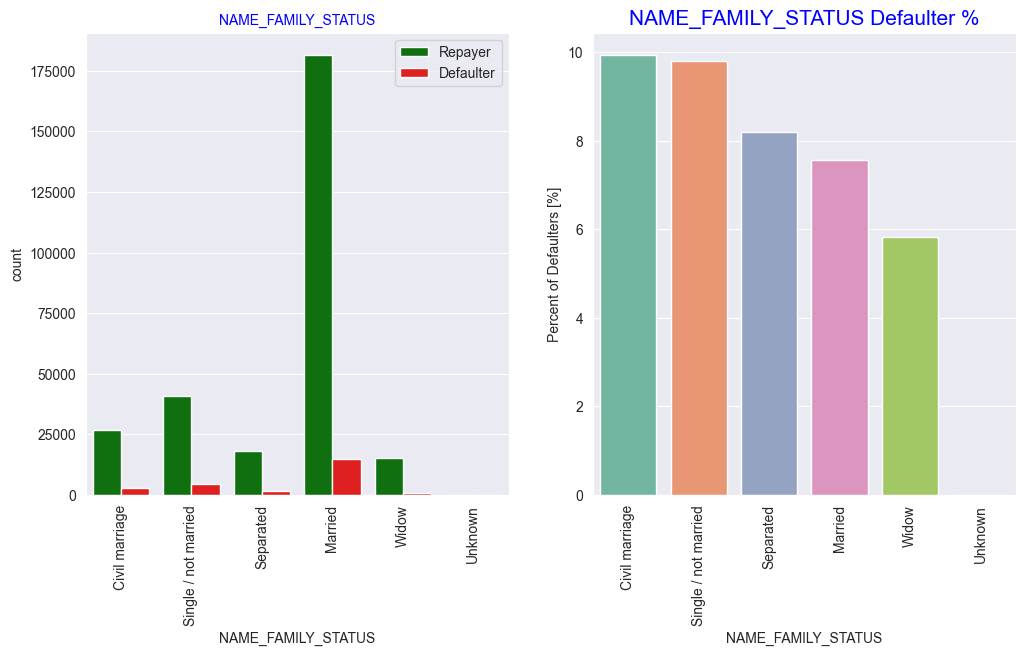

In [130]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

### Inferences:
- Most of the people who have taken loan are married, followed by Single/not married and civil marriage
- In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

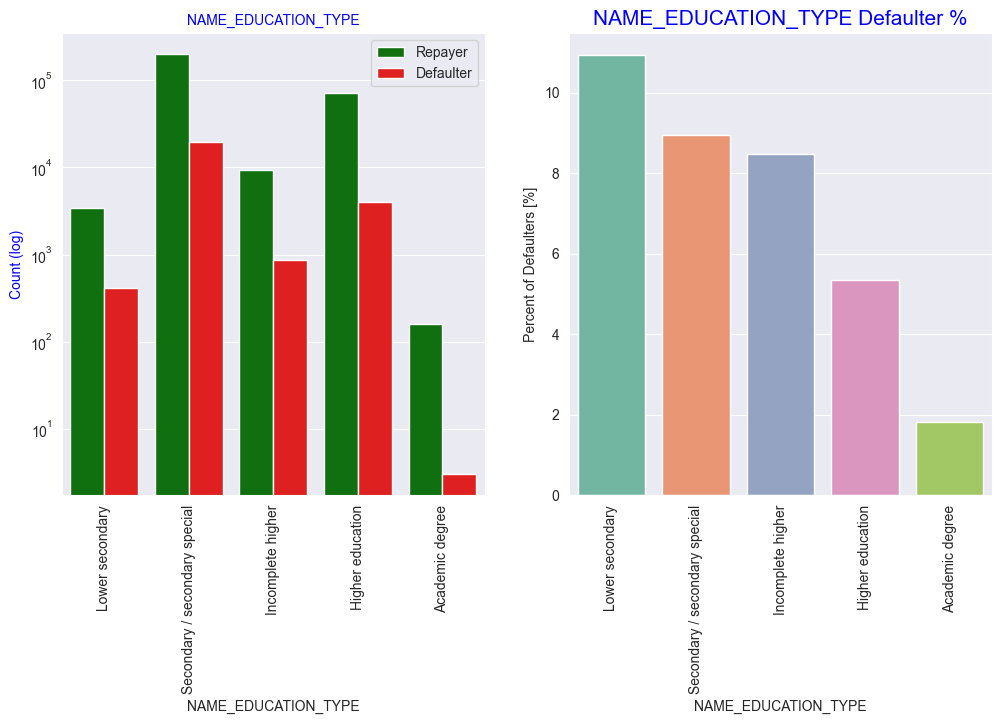

In [131]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

### Inferences:
- Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
- The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.

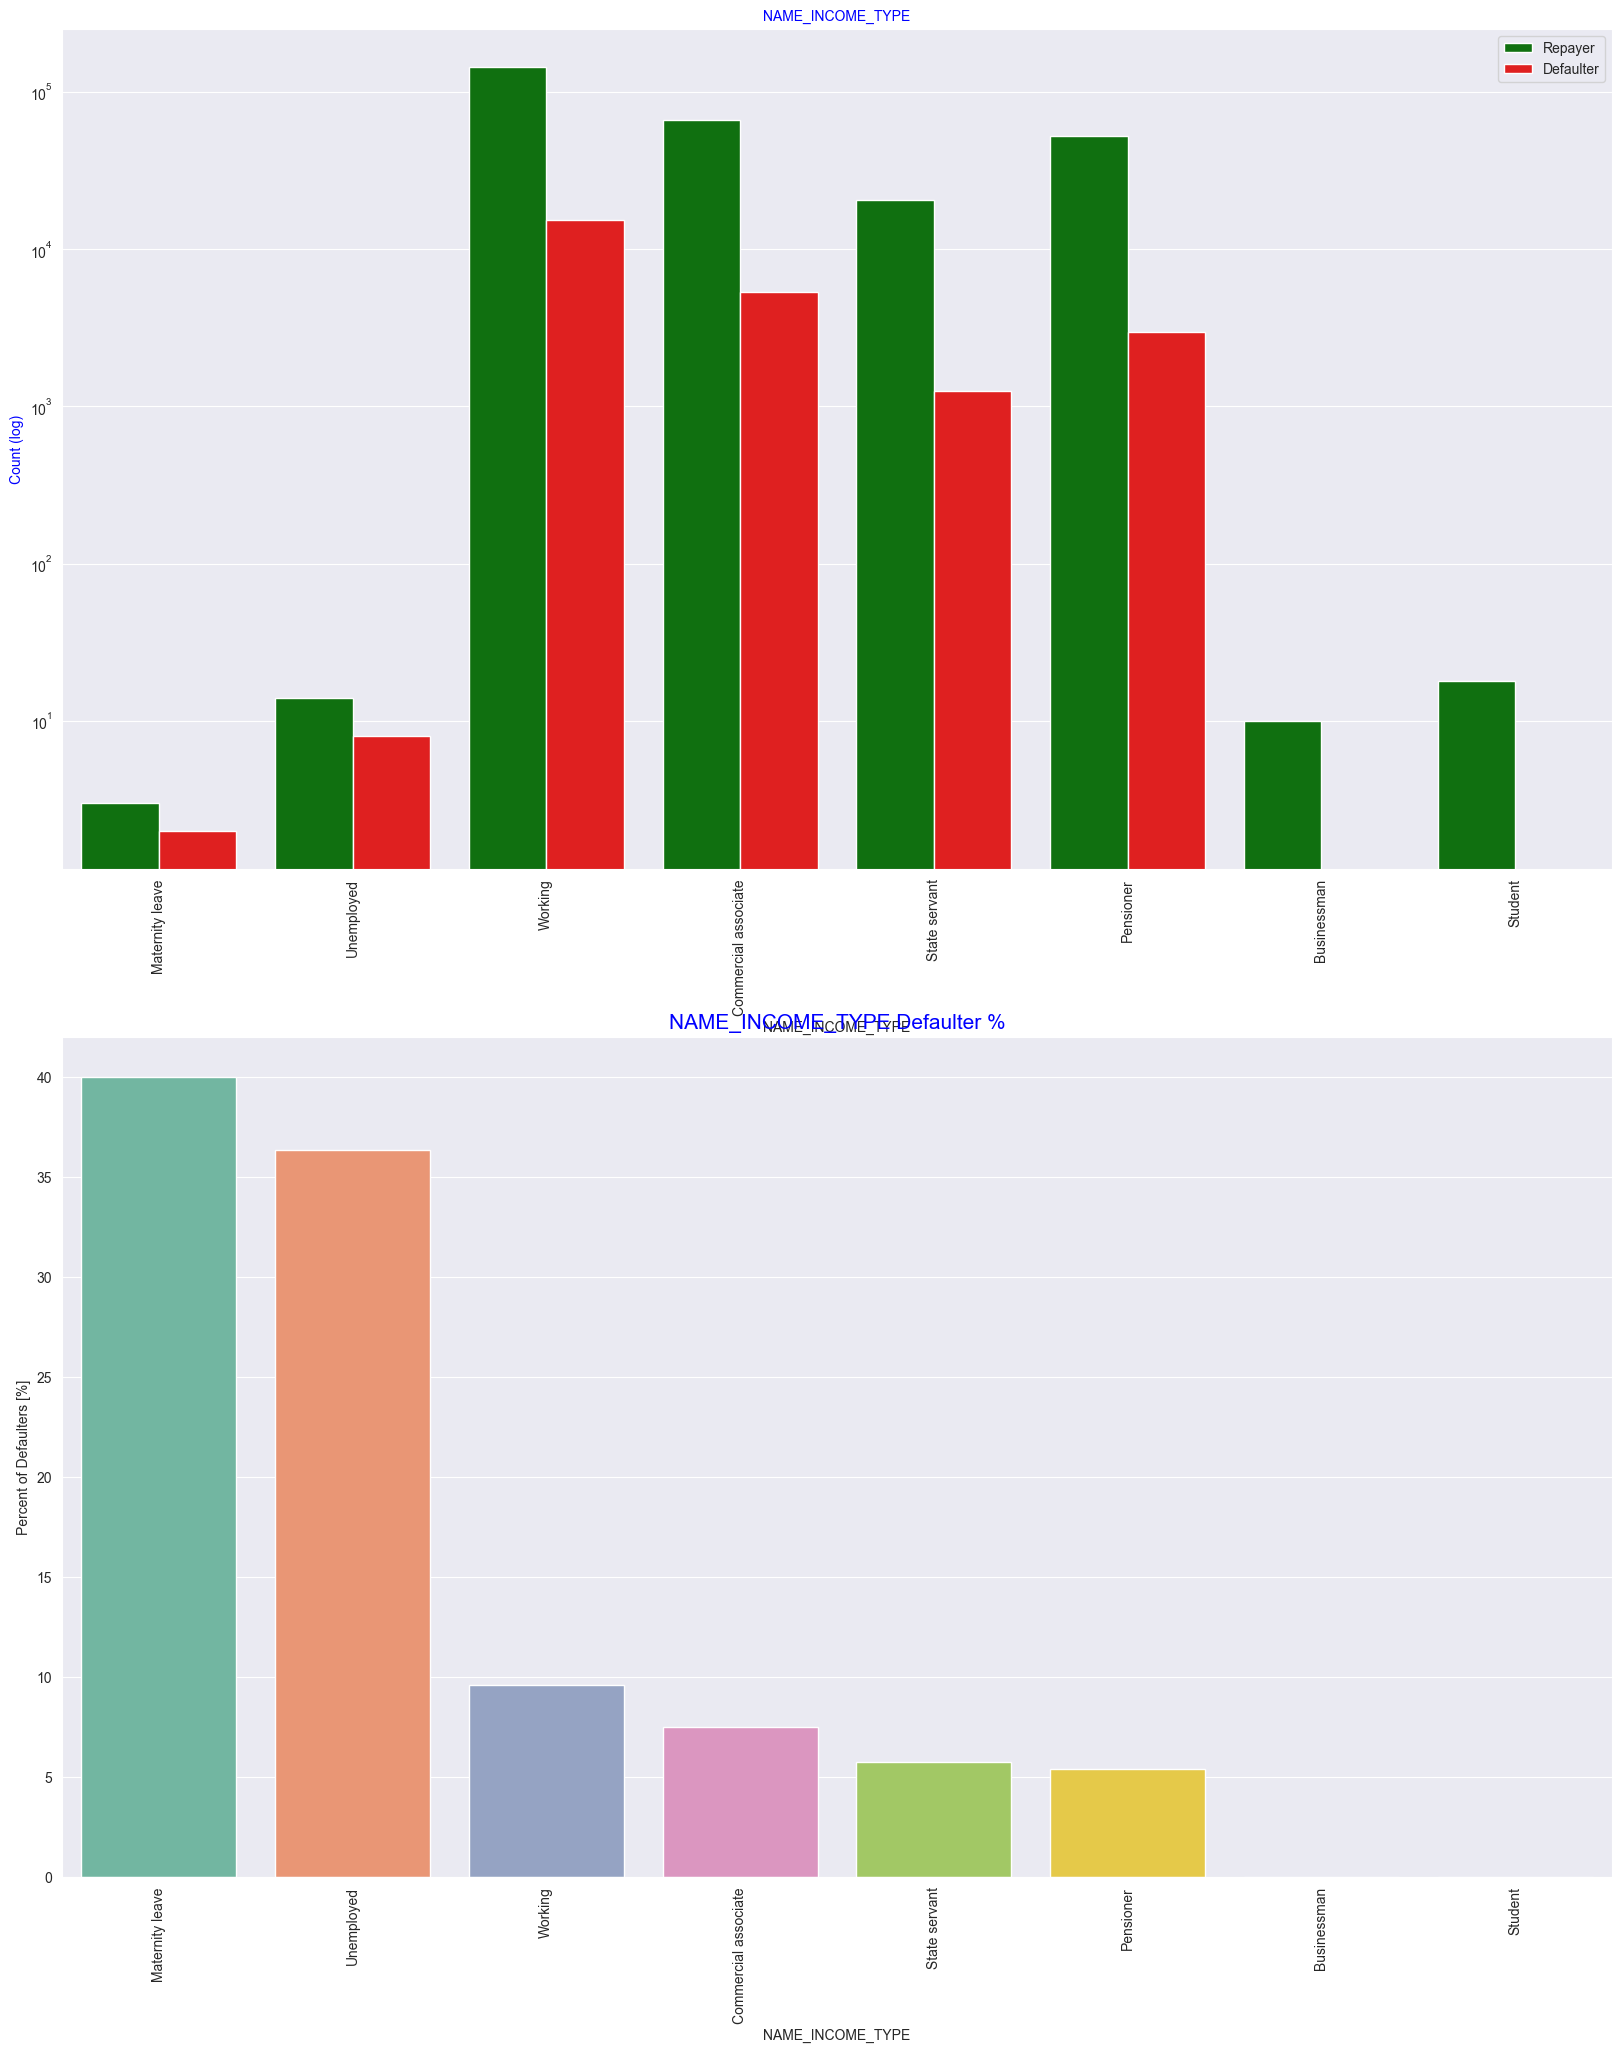

In [132]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

### Inferences:
- Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
- The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
- Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

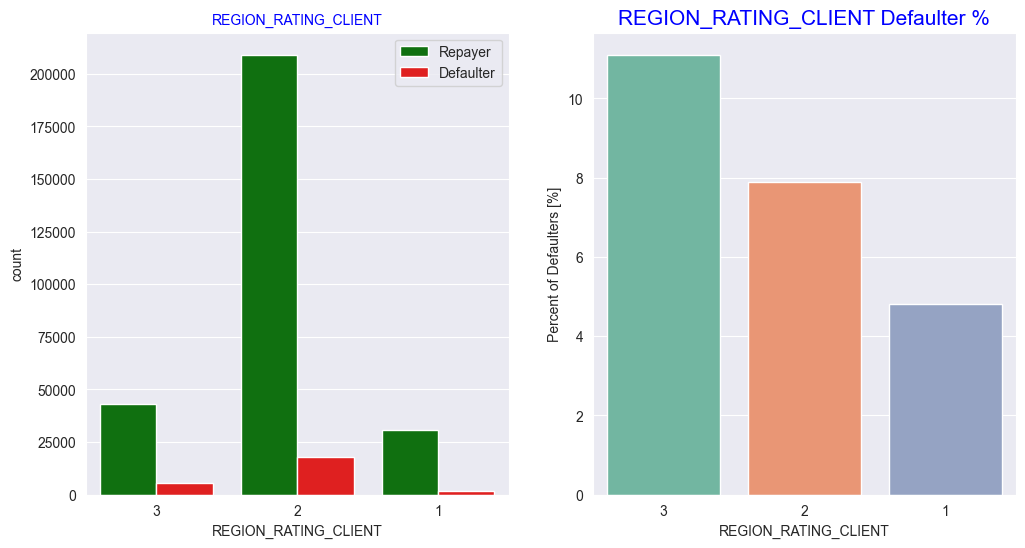

In [133]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

### Inferences:
- Most of the applicants are living in Region_Rating 2 place.
- Region Rating 3 has the highest default rate (11%)
- Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

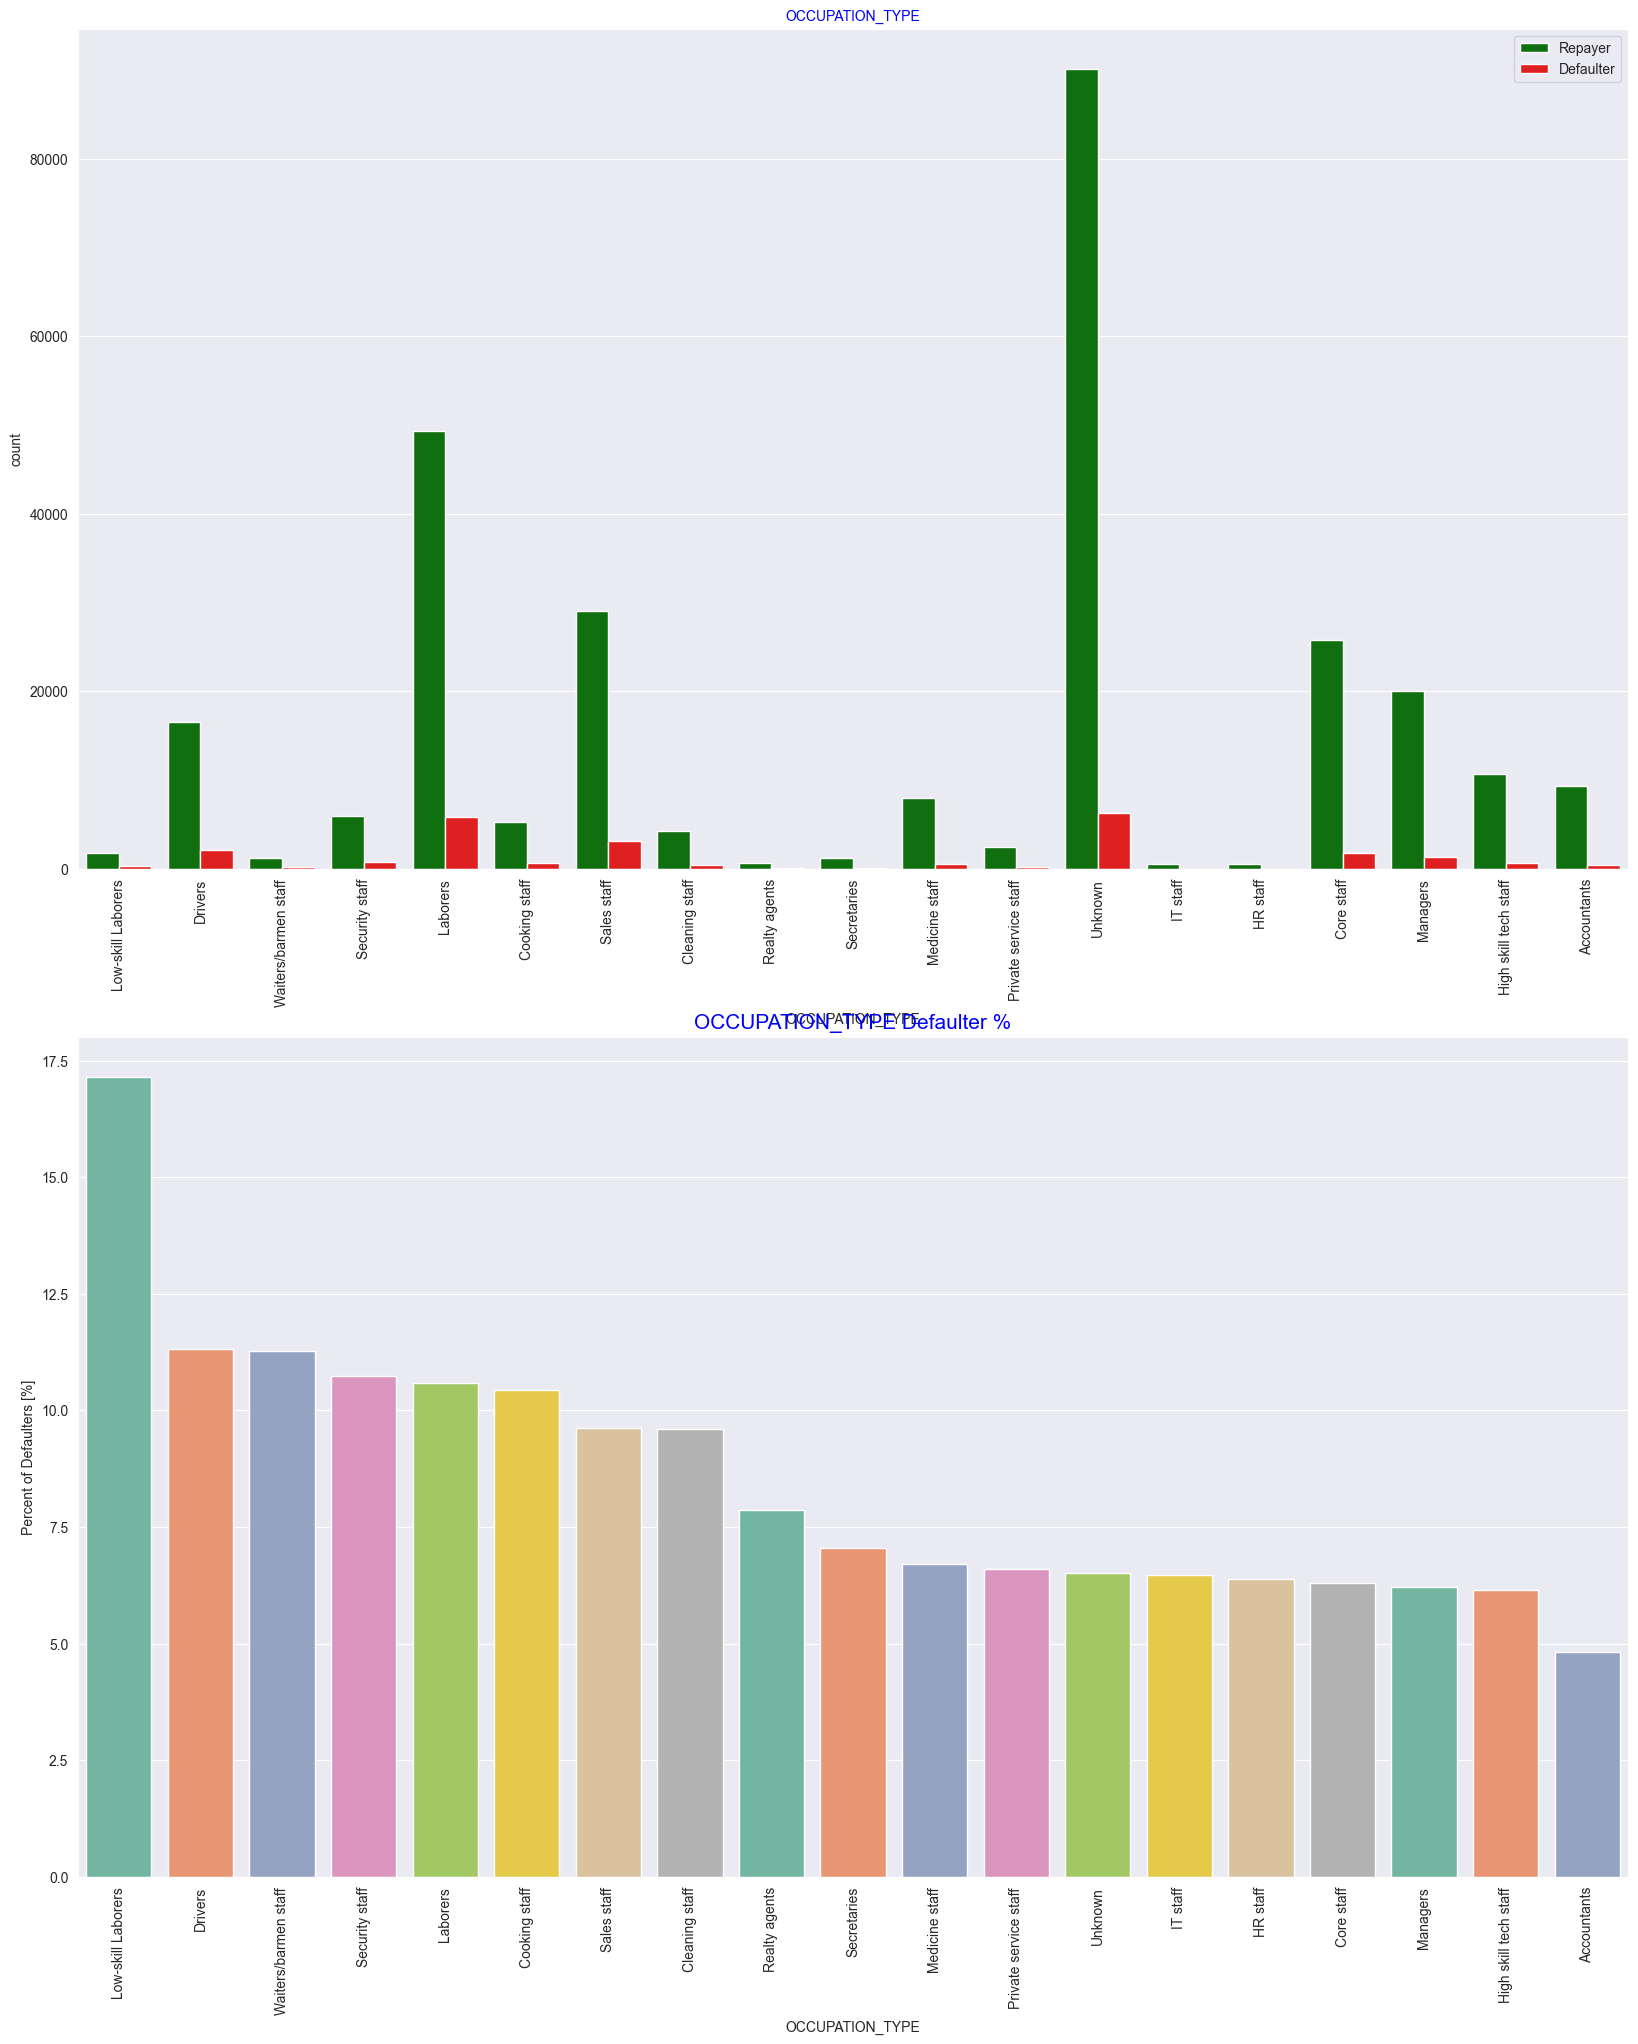

In [134]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

### Inferences:
- Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
- The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

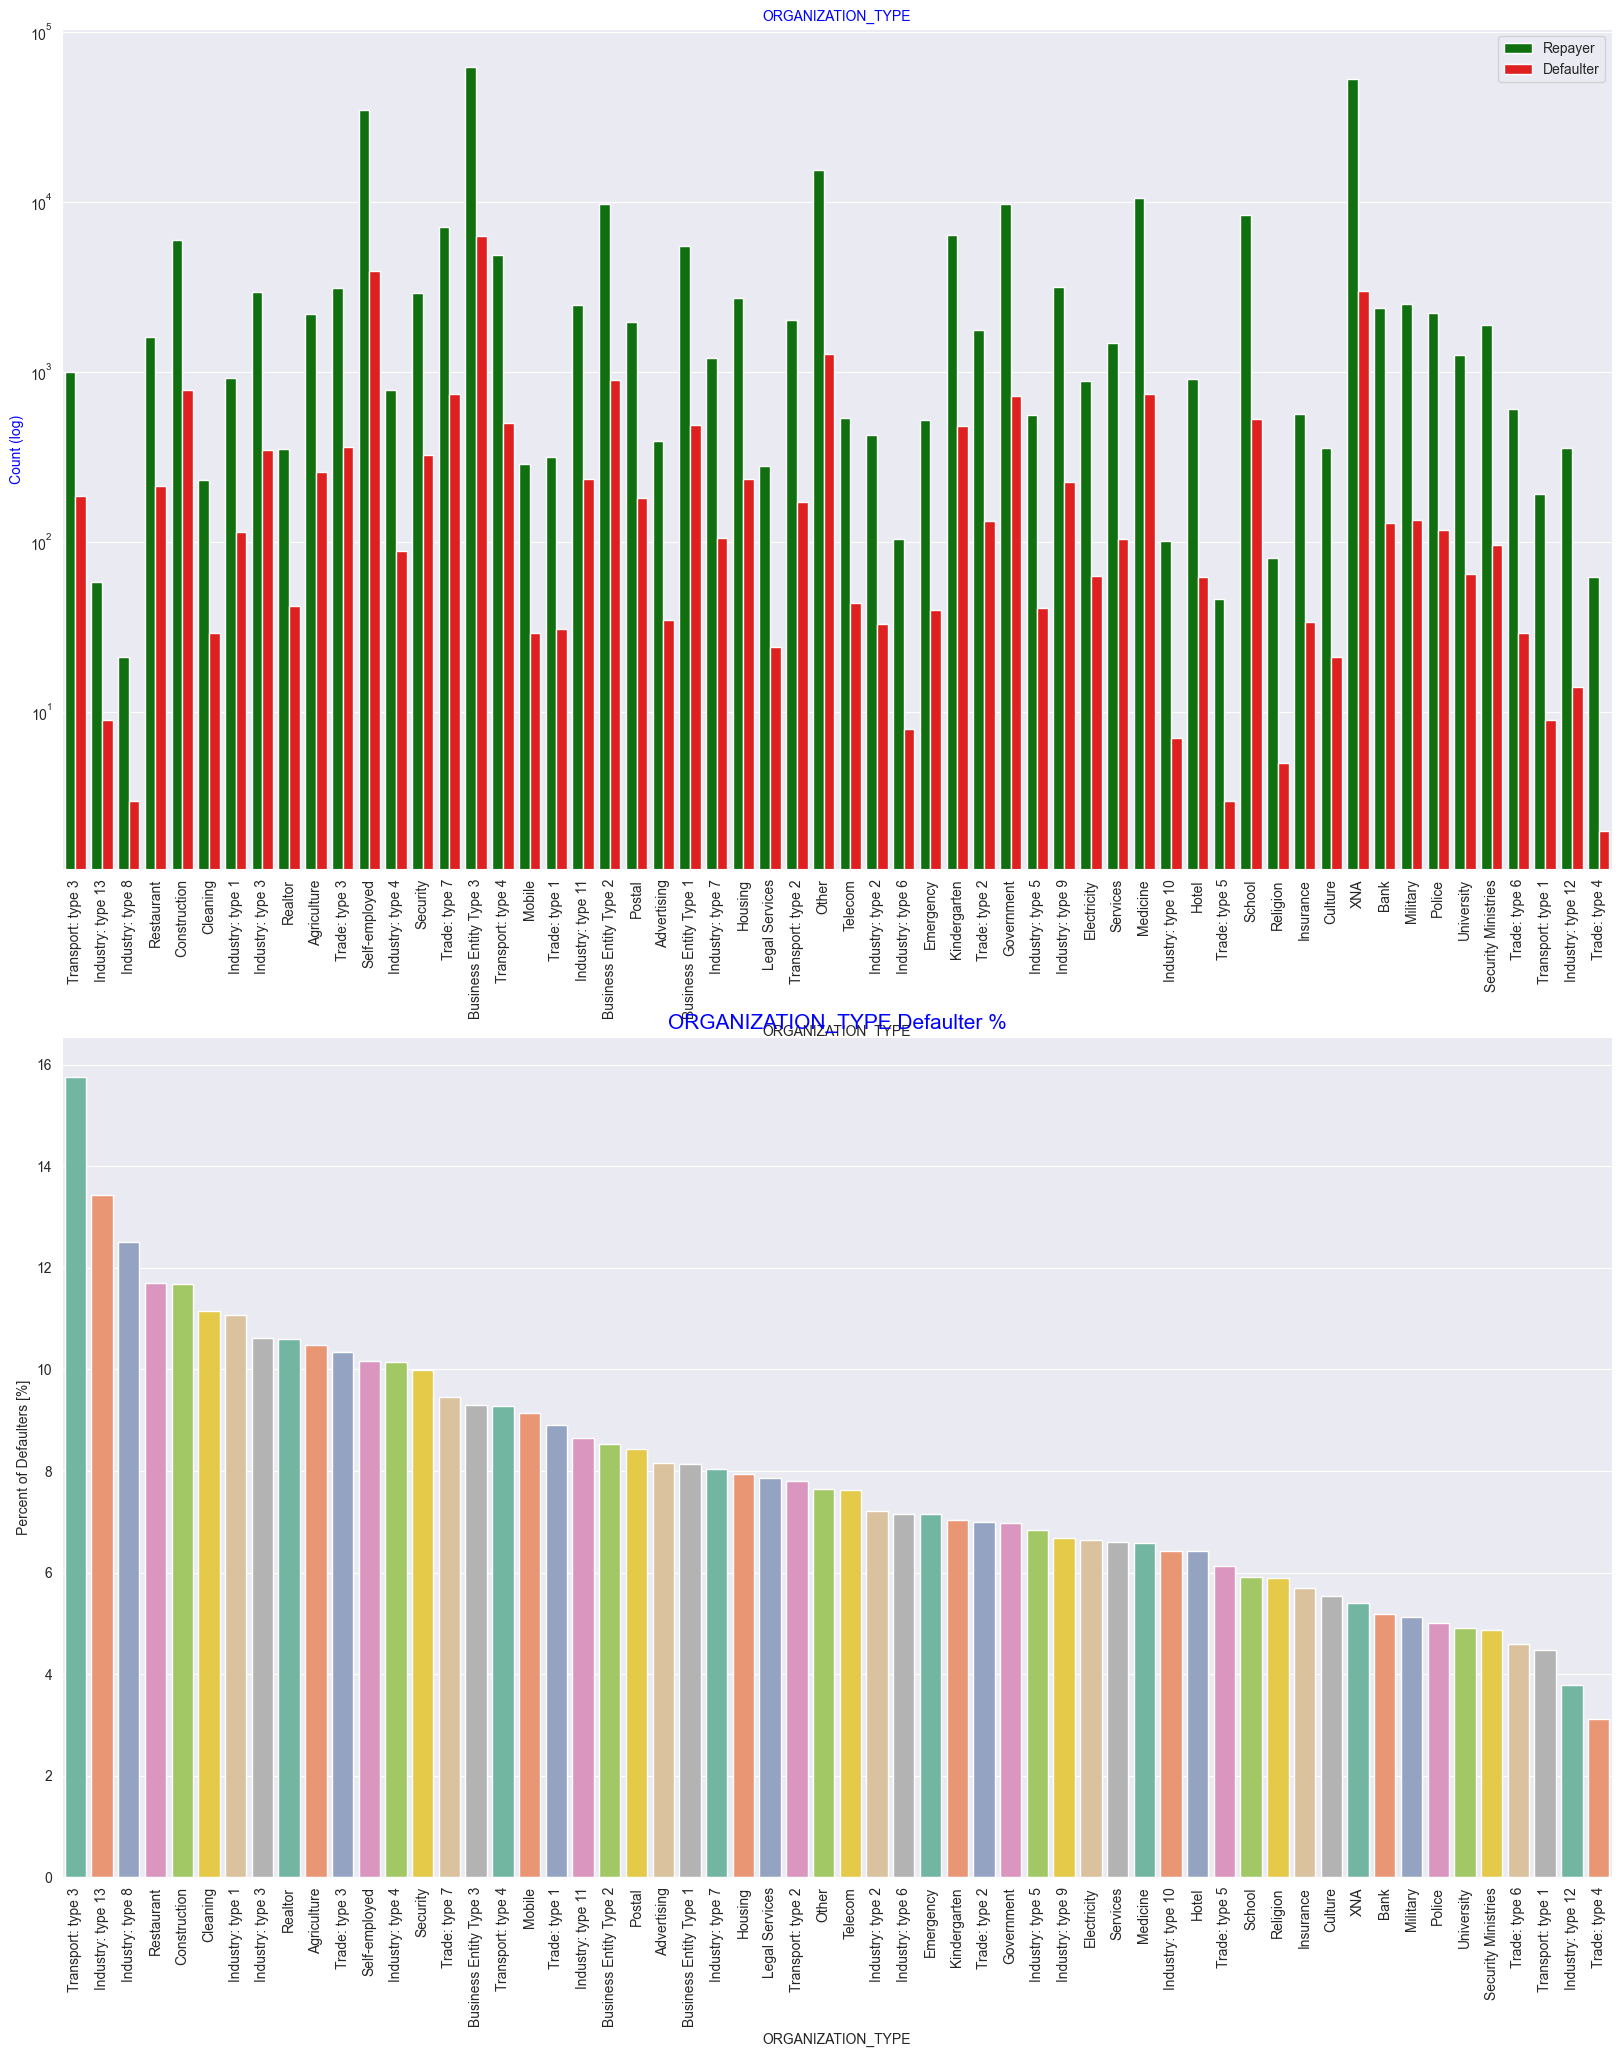

In [135]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

### Inferences:
- Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
- Most of the people application for loan are from Business Entity Type 3
- For a very high number of applications, Organization type information is unavailable(XNA)
- It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:
- Trade Type 4 and 5
- Industry type 8

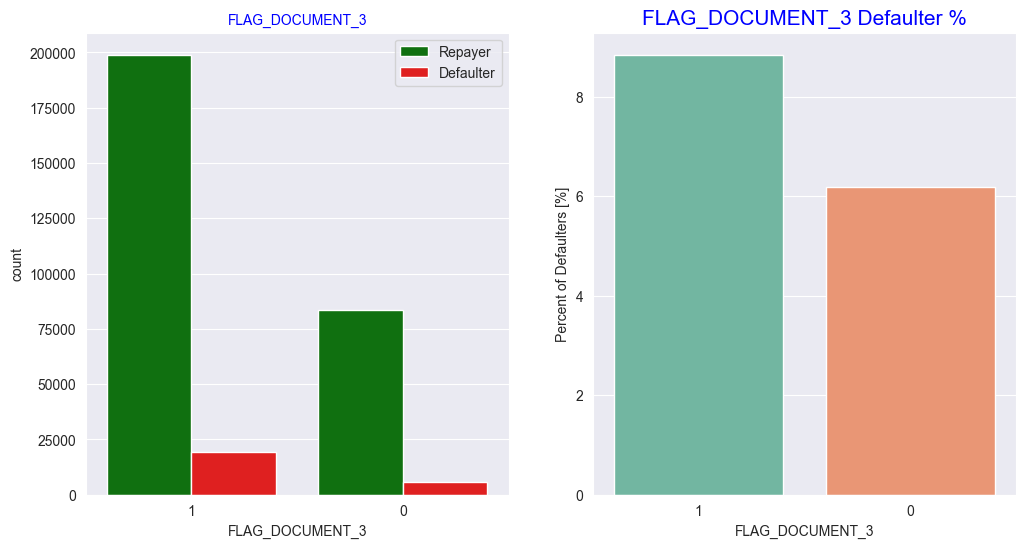

In [136]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

### Inferences:
- There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)

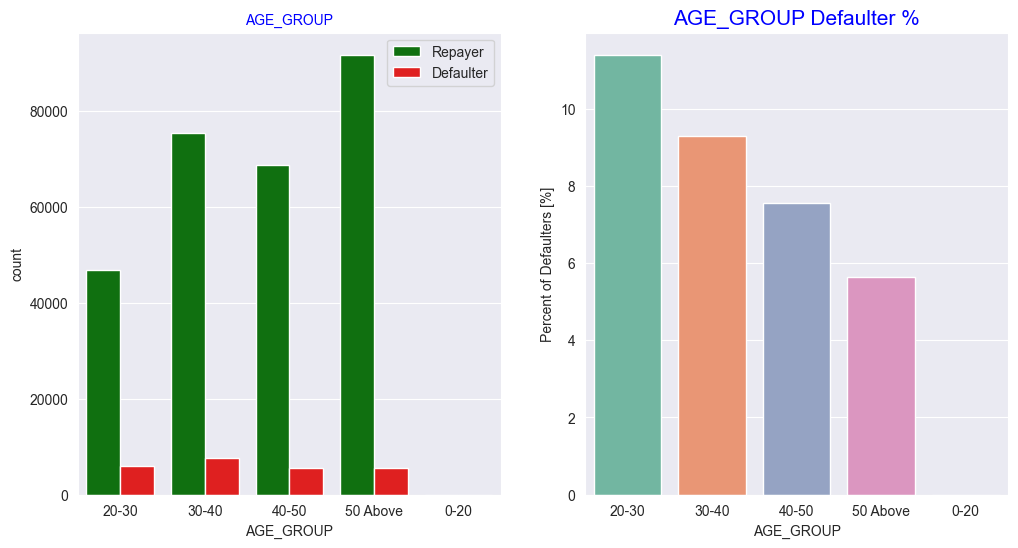

In [137]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

### Inferences:
- People in the age group range 20-40 have higher probability of defaulting
- People above age of 50 have low probability of defailting

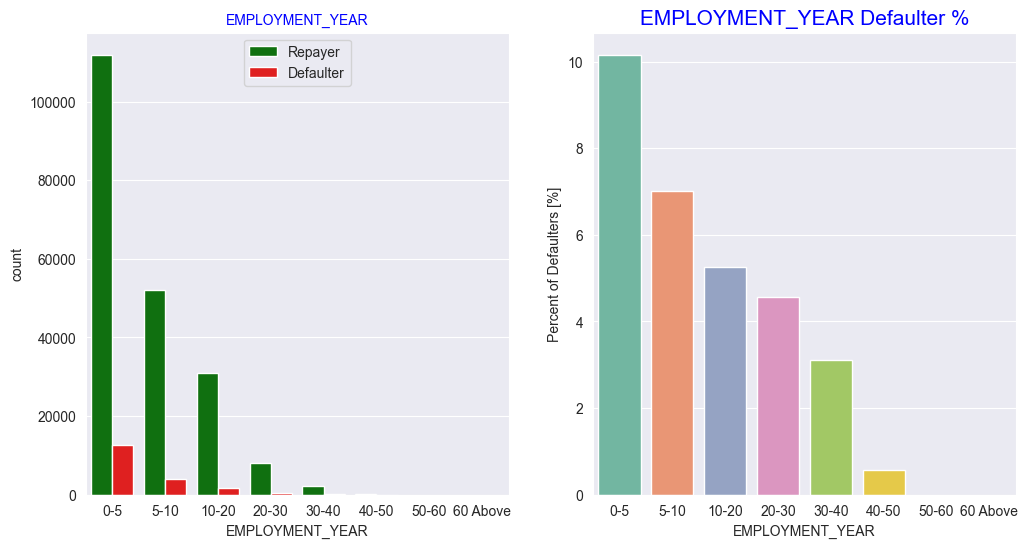

In [138]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

### Inferences:
- Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%
- With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

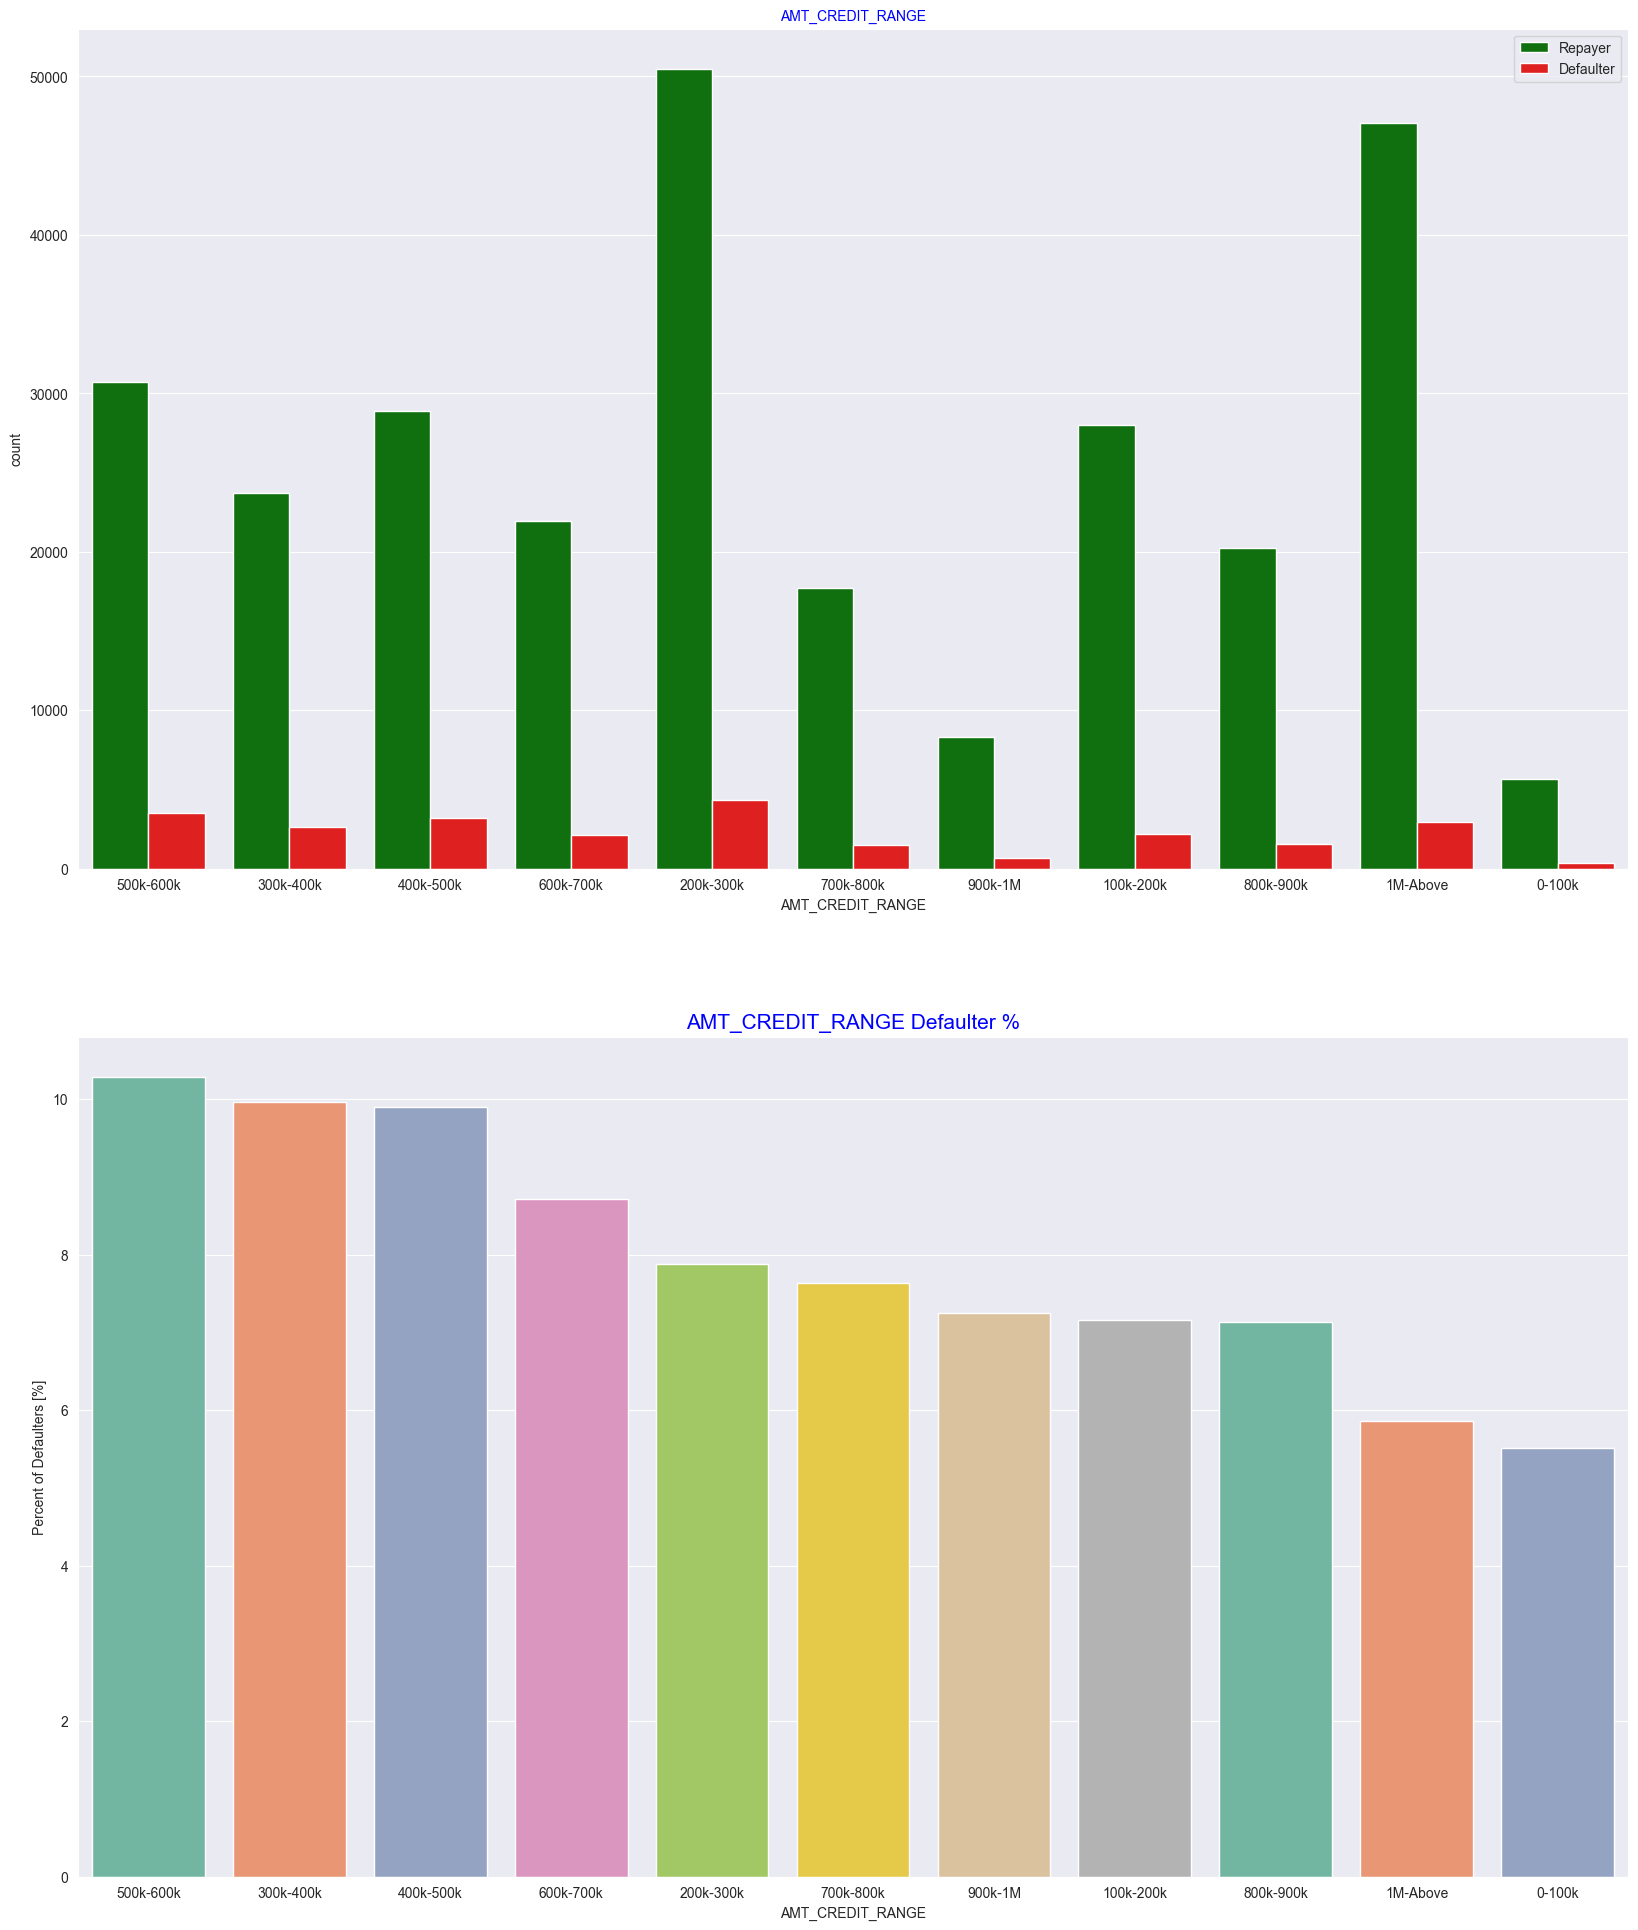

In [139]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

### Inferences:
- More than 80% of the loan provided are for amount less than 900,000
- People who get loan for 300-600k tend to default more than others.

In [140]:
# Analyzing Amount_Income Range based on loan repayment status
#univariate_categorical("AMT_INCOME_RANGE",False,False,False)

### Inferences:
- 90% of the applications have Income total less than 300,000
- Application with Income less than 300,000 has high probability of defaulting
- Applicant with Income more than 700,000 are less likely to default

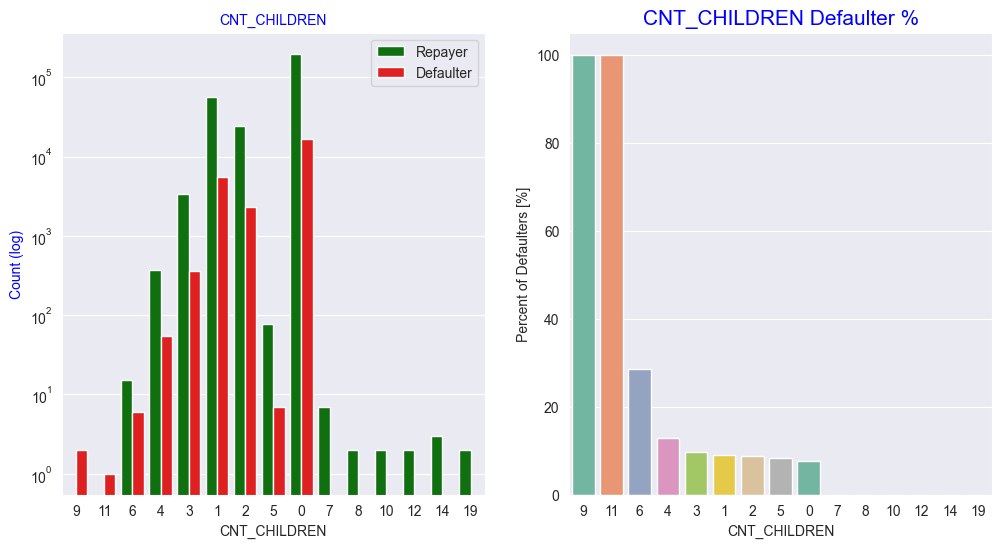

In [141]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

### Inferences:
- Most of the applicants do not have children
- Very few clients have more than 3 children.
- Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

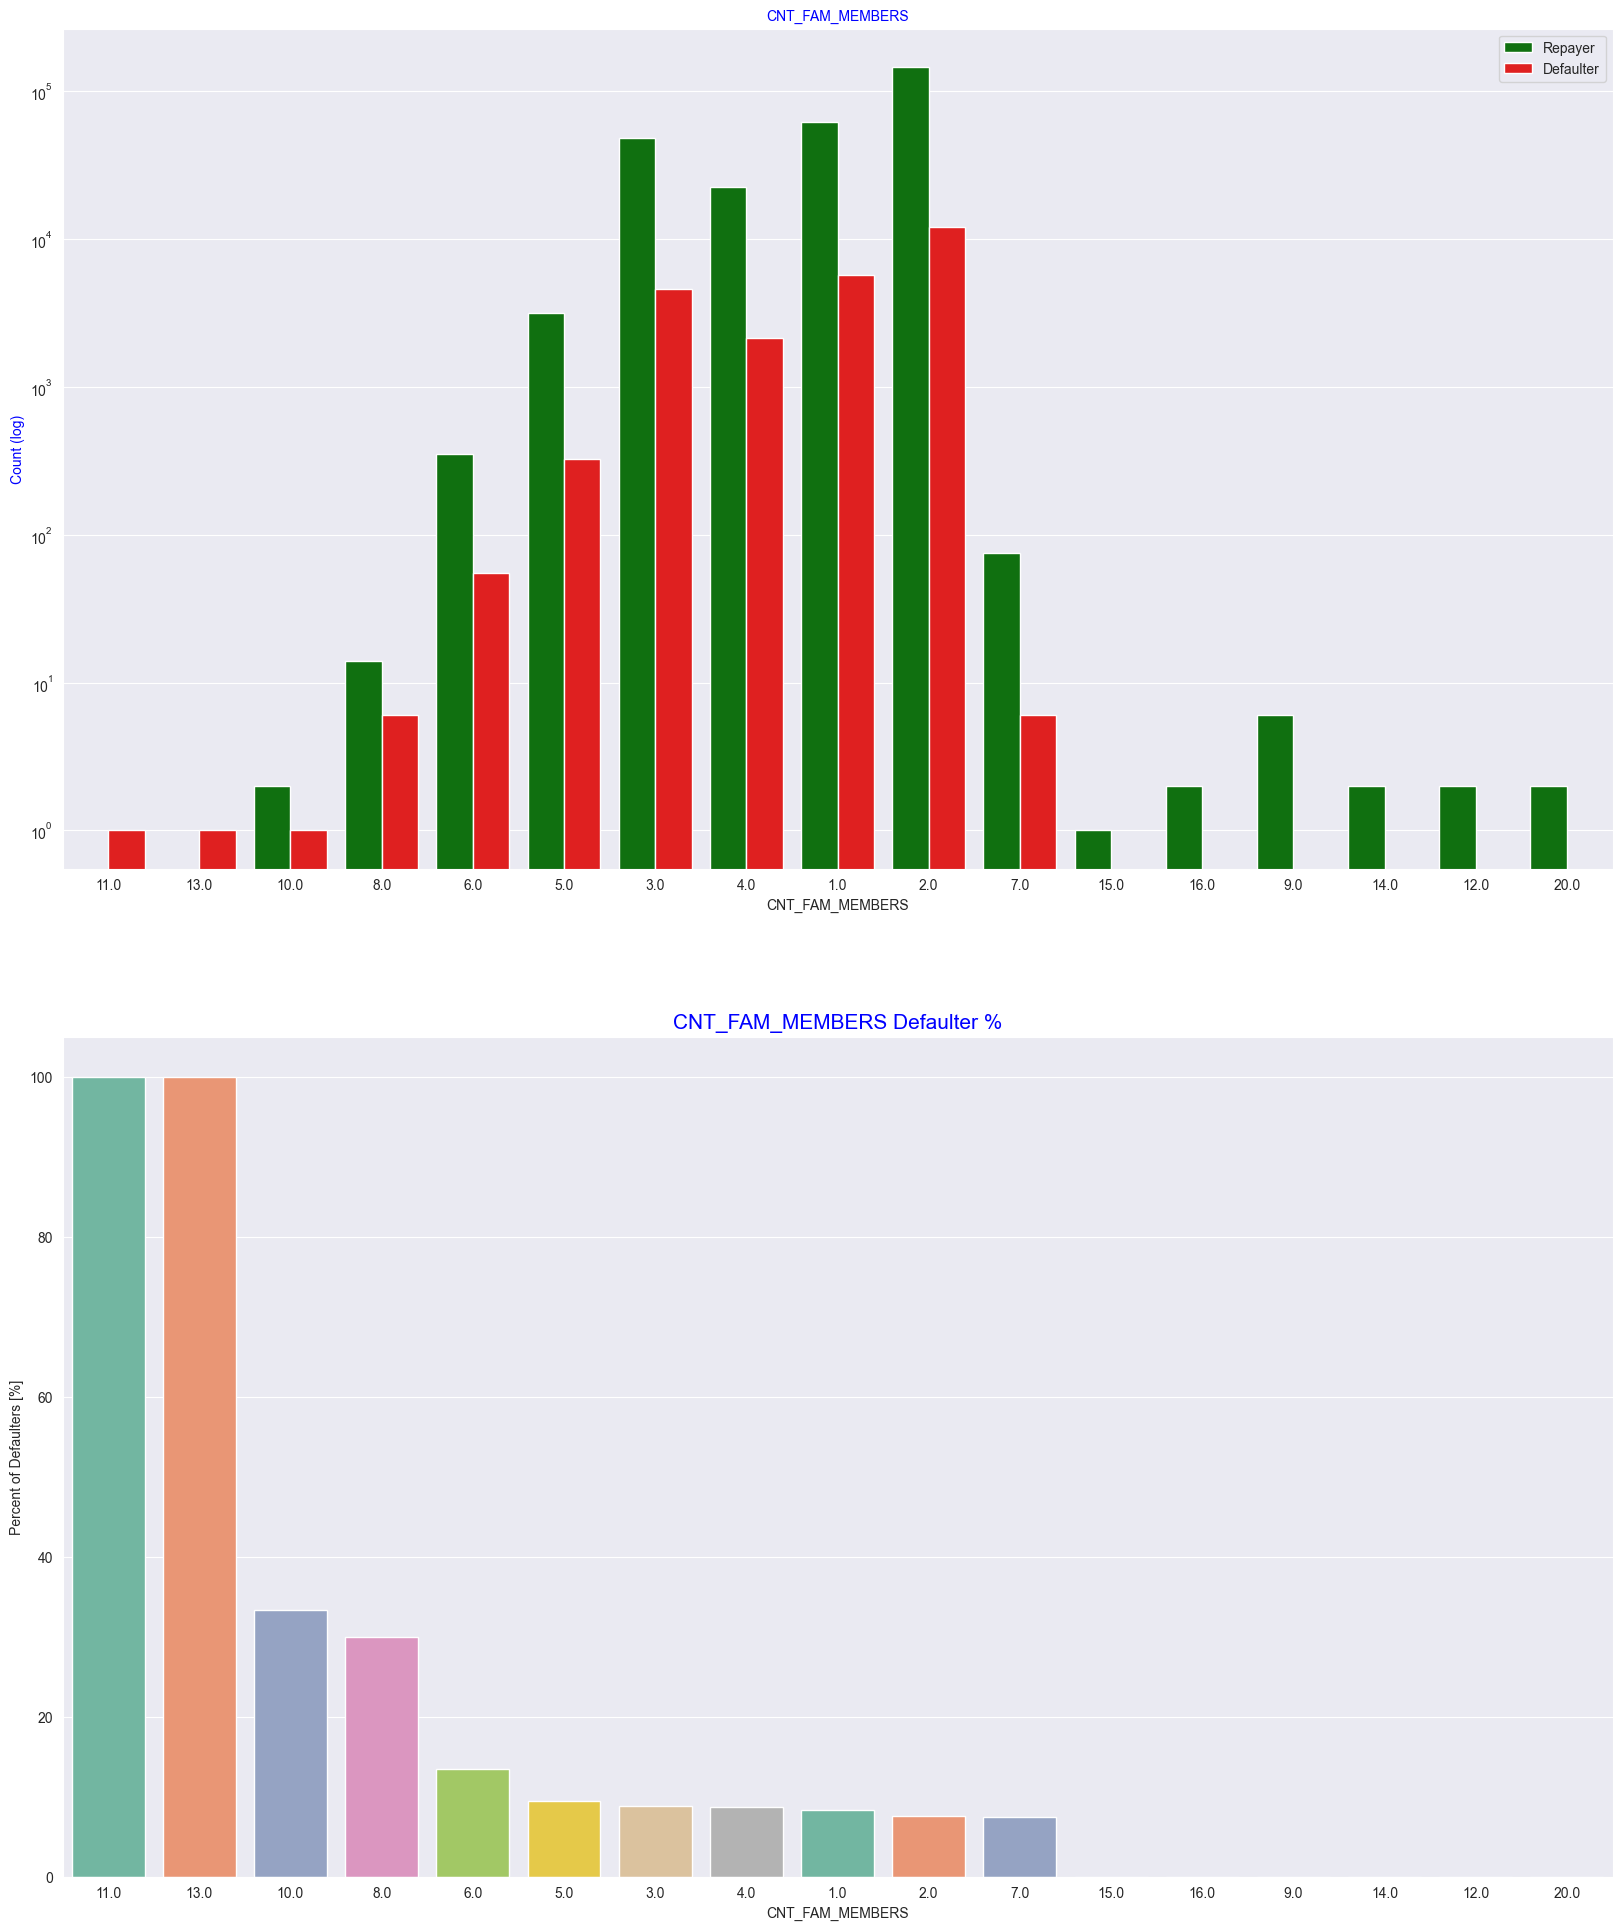

In [142]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

### Inferences:
- Family member follows the same trend as children where having more family members increases the risk of defaulting

## Categorical Bi/Multivariate Analysis

In [143]:
application.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%  \
NAME_INCOME_TYPE                                                            
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500   
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000   
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000   
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700   
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750   
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750   
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875   
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500   

                          75%        max  
NAME_INCOME_TYPE                          
Businessman           8.43750    22.5000  
Commercial associate  2.25000   180.0009  
Maternity leave       1.35000     3.6000  
Pensioner             1.66500    22.5000  
State servant         2.25000    31.5000  
Student               1.78875     5.6250  
Unemployed            1.35000     3.3750  
Working               2.02500  1170.0000

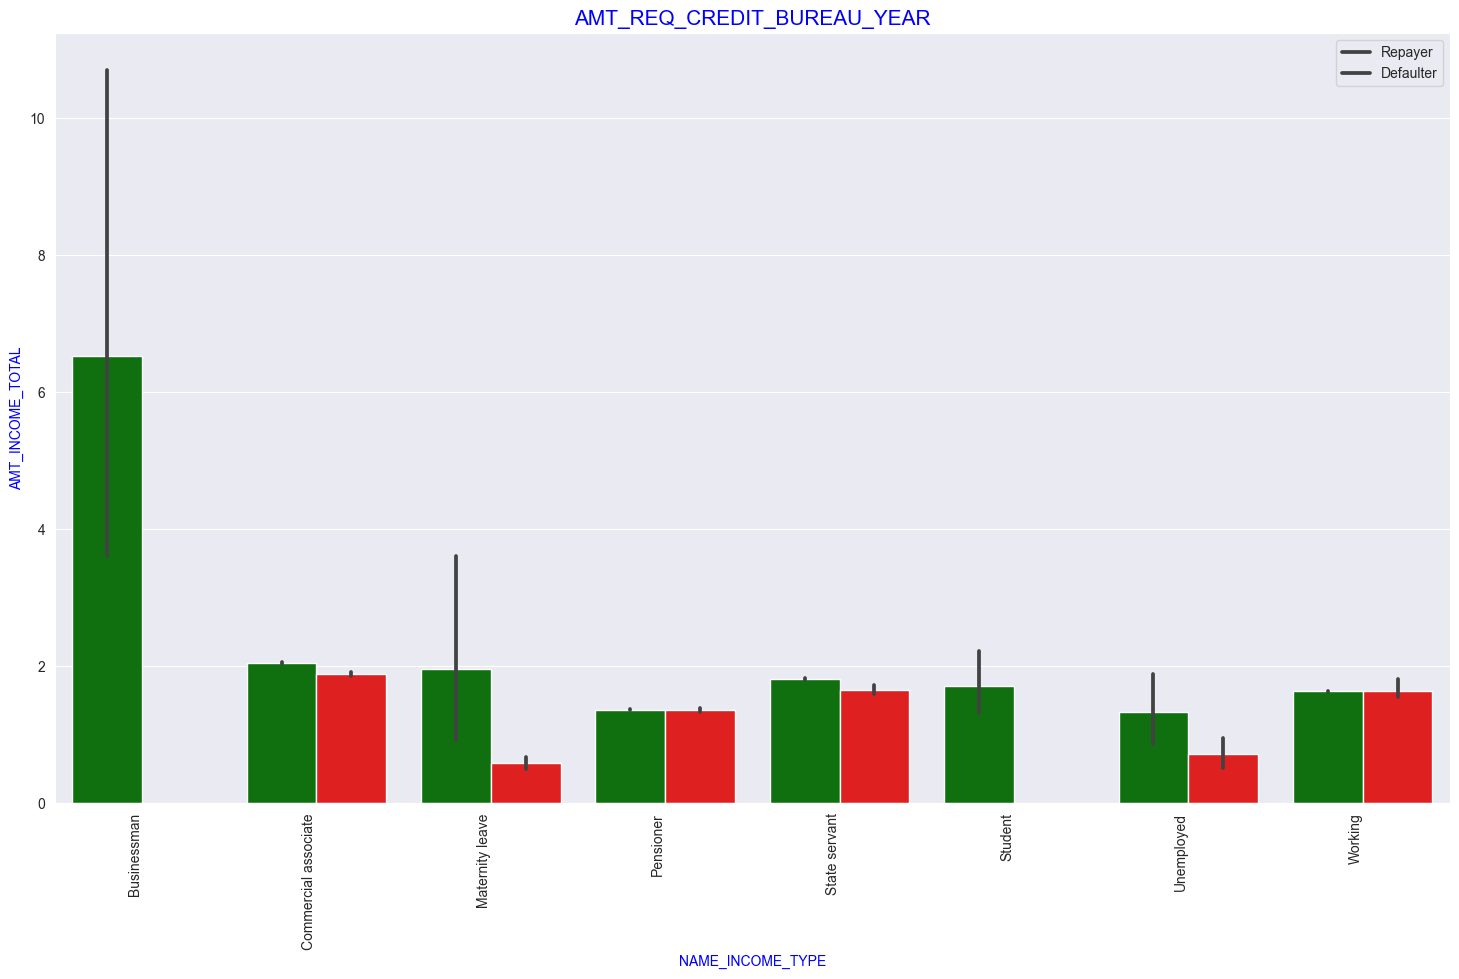

In [144]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application,"TARGET",(18,10))

### Inferences:
- It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

## Numeric Variable Analysis

Bifurcating the application dataframe based on Target value 0 and 1 for correlation and other analysis

In [145]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [146]:
# Bifurcating the application dataframe based on target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',  'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                         'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                         'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
Repayer_df=application.loc[application['TARGET']==0,cols_for_correlation]
Defaulter_df=application.loc[application['TARGET']==1,cols_for_correlation]

## Correlation between numeric variable

In [147]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(11)

VAR1                        VAR2  Correlation
94        AMT_GOODS_PRICE                  AMT_CREDIT     0.987250
230       CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571
95        AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686
71            AMT_ANNUITY                  AMT_CREDIT     0.771309
167         DAYS_EMPLOYED                  DAYS_BIRTH     0.626114
258  REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.539005
70            AMT_ANNUITY            AMT_INCOME_TOTAL     0.418953
93        AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.349462
47             AMT_CREDIT            AMT_INCOME_TOTAL     0.342799
138            DAYS_BIRTH                CNT_CHILDREN     0.336966
190     DAYS_REGISTRATION                  DAYS_BIRTH     0.333151

<Axes: >

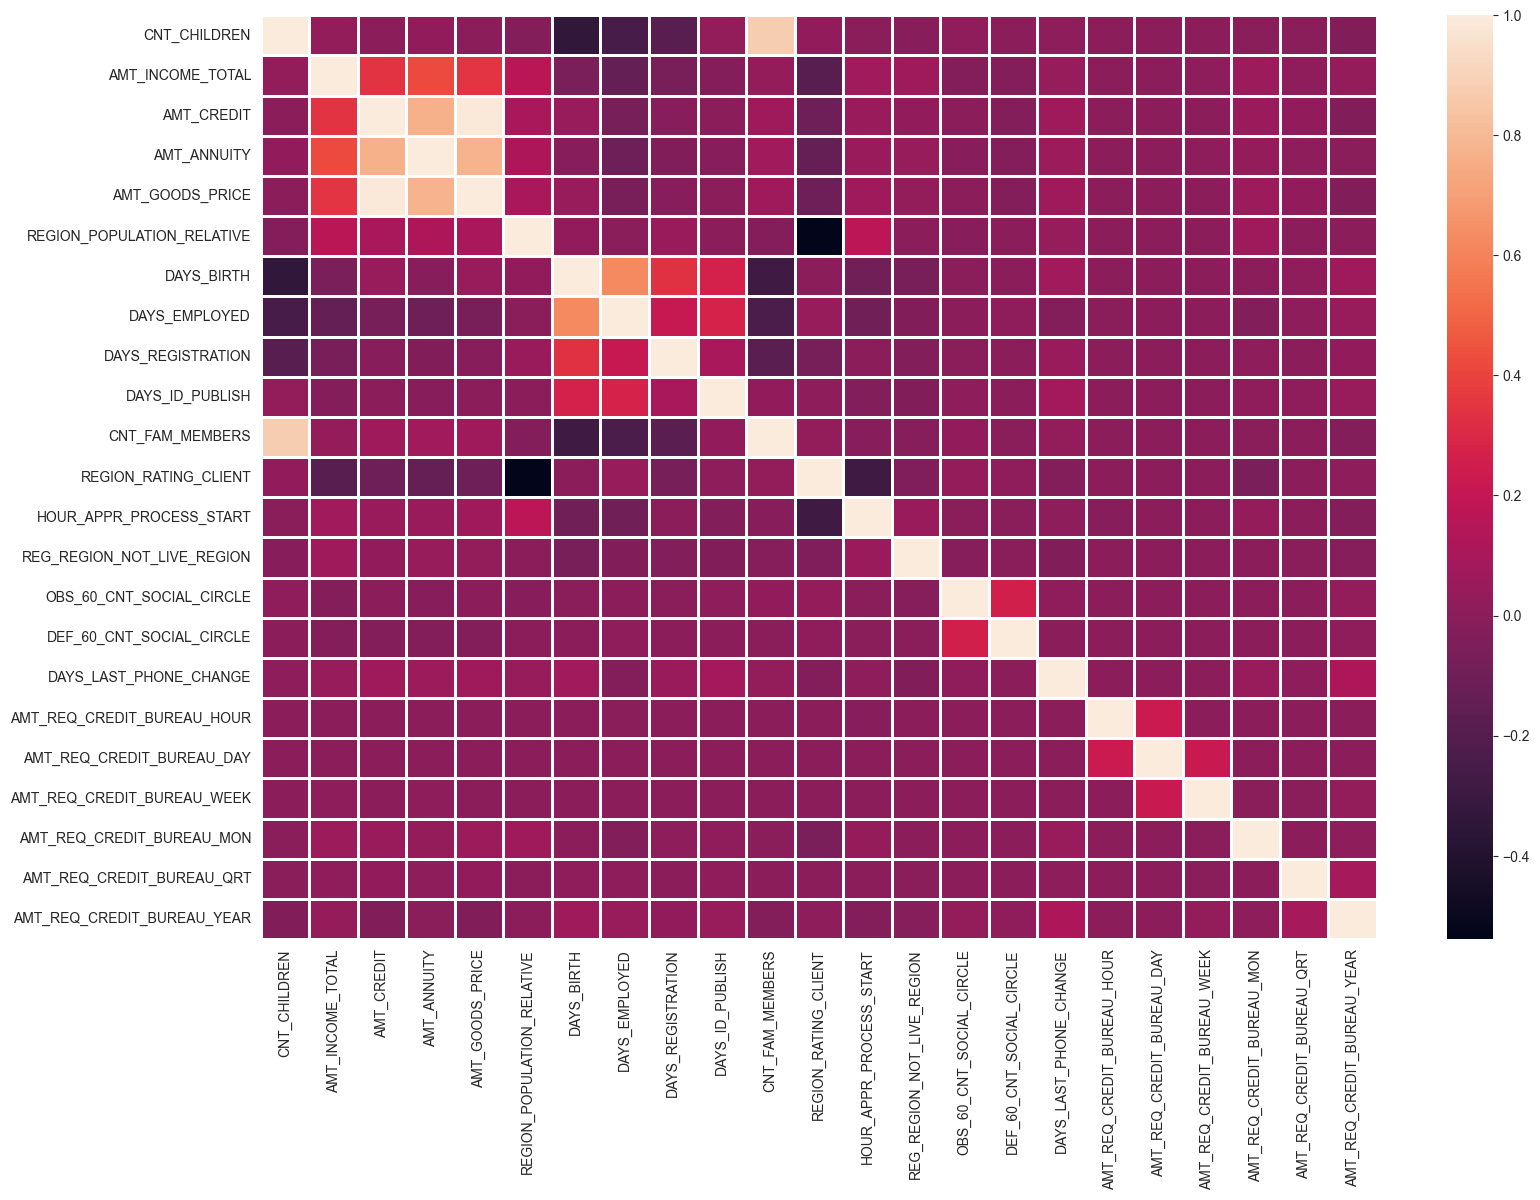

In [148]:
fig=plt.figure(figsize=(18,12))
sns.heatmap(Repayer_df.corr(),linewidth=1)

### Inferences:
Correlating factors amongst repayers:
- Credit amount is highly correlated with
- amount of goods price
- loan annuity
- total income
- We can also see that repayers have high correlation in number of days employed.

In [149]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool_))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(11)

VAR1                        VAR2  Correlation
94            AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
71                AMT_ANNUITY                  AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
258      REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.443236
287   HOUR_APPR_PROCESS_START        REGION_RATING_CLIENT     0.293908
190         DAYS_REGISTRATION                  DAYS_BIRTH     0.289114
359  DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.264159
138                DAYS_BIRTH                CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                  DAYS_BIRTH     0.252863

<Axes: >

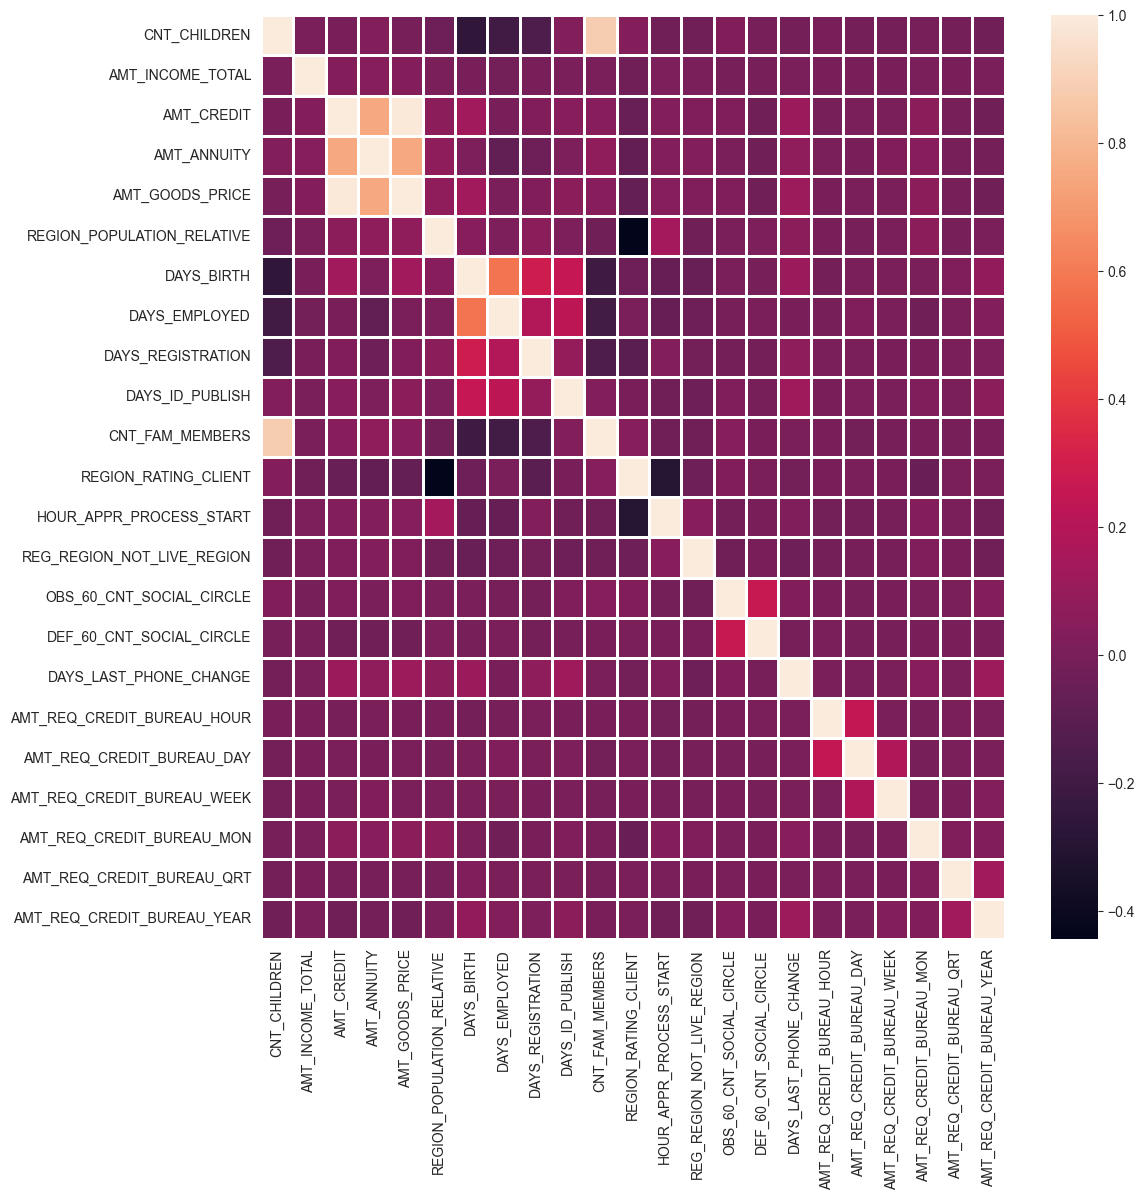

In [150]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(Defaulter_df.corr(),linewidth=1)

### Inferences:
- Credit amount is highly correlated with amount of goods price which is same as repayers.
- But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
- We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
- There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
- Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
- There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

## Numerical Univariate Analysis

In [151]:
corr_df_Defaulter.head(11)

VAR1                        VAR2  Correlation
94            AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
71                AMT_ANNUITY                  AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
258      REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.443236
287   HOUR_APPR_PROCESS_START        REGION_RATING_CLIENT     0.293908
190         DAYS_REGISTRATION                  DAYS_BIRTH     0.289114
359  DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.264159
138                DAYS_BIRTH                CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                  DAYS_BIRTH     0.252863

In [152]:
Defaulter_df.AMT_INCOME_TOTAL

0         2.025
26        1.125
40        2.025
42        1.350
81        0.810
          ...  
307448    2.070
307475    1.440
307481    2.250
307489    2.250
307509    1.710
Name: AMT_INCOME_TOTAL, Length: 24825, dtype: float64

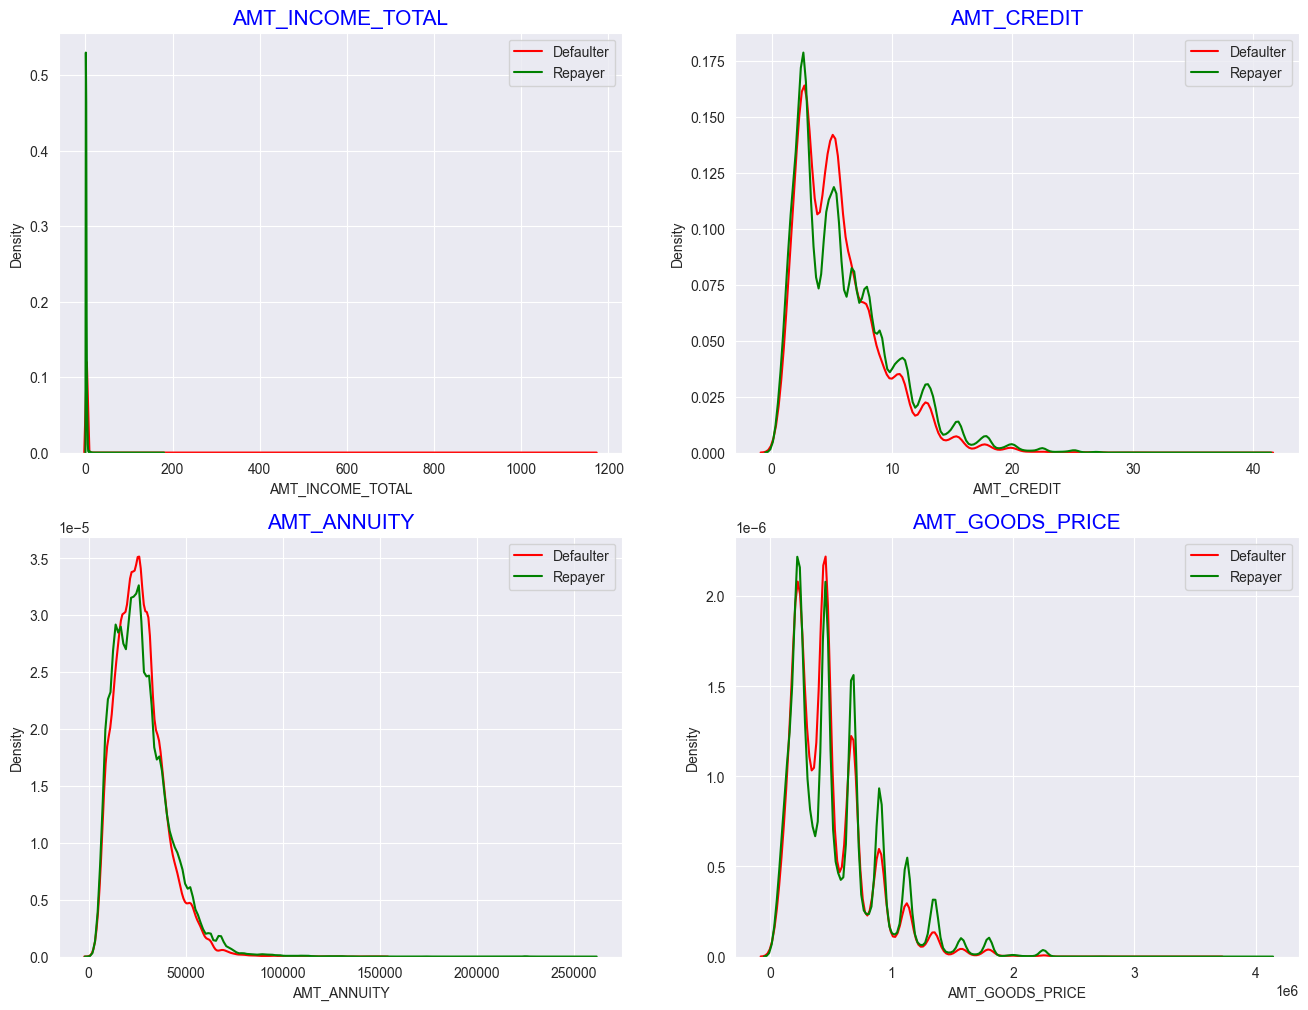

In [153]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount=application[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

fig=plt.figure(figsize=(16,12))
for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    column_name = str(i[1])
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter"),
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
    plt.legend()

### Inferences:
- Most no of loans are given for goods price below 10 lakhs
- Most people pay annuity below 50000 for the credit loan
- Credit amount of the loan is mostly less then 10 lakhs
- The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

### Numerical Bivariate Analysis

<Figure size 1500x600 with 0 Axes>

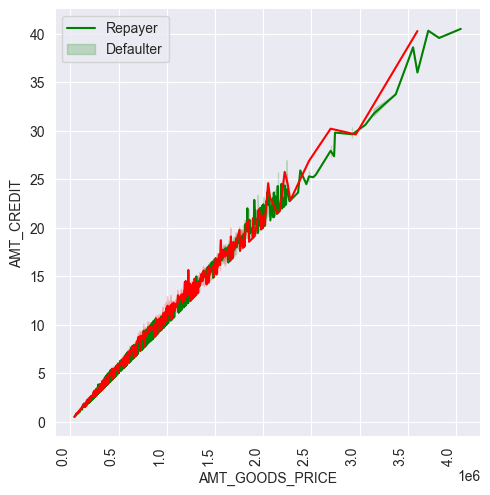

In [154]:
# Checking the relationship between Goods price and credit and comparing with loan repayment status
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',application,'TARGET','line',['g','r'],False,(15,6))

### Inferences:
When the credit amount goes beyond 3M,there is an increase in Defaulters.

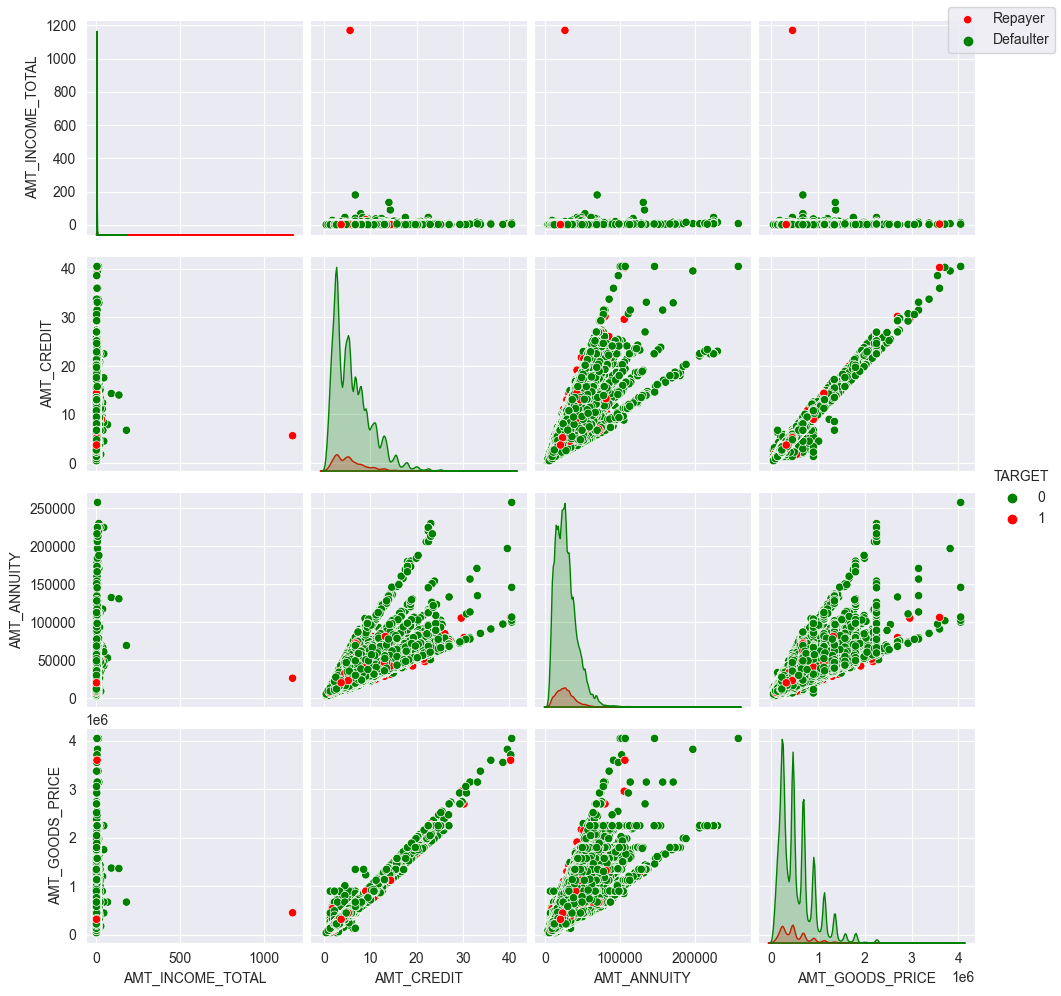

In [155]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = application[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])


### Inferences:
- When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters
- AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
- There are very less defaulters for AMT_CREDIT >3M
- Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

## Merged Dataframes Analysis

In [156]:
# Merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df=pd.merge(application,previous,how='inner',on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0             2.025      4.065975   
1               N             0             2.700     12.935025   
2               N             0             2.700     12.935025   
3               N             0             2.700     12.935025   
4               Y             0             0.675      1.350000   

   AMT_ANNUITY_x  ...   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0        24700.5  ...              Vehicles            POS               XNA   
1        35698.5  ...                   XNA           Cash            x-sell   
2        35698.5  ...             Furniture            POS               XNA   
3        35698.5  ...  Consumer Electronics            POS               XNA   
4         6750.0  ...                Mobile            POS               XNA   

              CHANNEL_TYPE SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
0                    Stone              500       Auto technology   
1  Credit and cash offices               -1                   XNA   
2                    Stone             1400             Furniture   
3             Country-wide              200  Consumer electronics   
4         Regional / Local               30          Connectivity   

   CNT_PAYMENT  NAME_YIELD_GROUP          PRODUCT_COMBINATION  \
0         24.0        low_normal      POS other with interest   
1         12.0        low_normal             Cash X-Sell: low   
2          6.0            middle   POS industry with interest   
3         12.0            middle  POS household with interest   
4          4.0            middle  POS mobile without interest   

   DAYS_DECISION_GROUP  
0              400-800  
1              400-800  
2             800-1200  
3            2000-2400  
4             800-1200  

[5 rows x 73 columns]

In [157]:
# Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 73)

In [158]:
# Checking the element count of the dataframe
loan_process_df.size

103200173

In [159]:
# Checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 73 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [160]:
# Checking merged dataframe numerical column statistics
loan_process_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06   
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+00   
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+00   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01   
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+00   
50%    2.789920e+05  0.000000e+00  0.000000e+00      1.575000e+00   
75%    3.675560e+05  0.000000e+00  1.000000e+00      2.070000e+00   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+03   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.413701e+06   1.413608e+06       1.412493e+06   
mean   5.875537e+00   2.701702e+04       5.277186e+05   
std    3.849173e+00   1.395116e+04       3.532465e+05   
min    4.500000e-01   1.615500e+03       4.050000e+04   
25%    2.700000e+00   1.682100e+04       2.385000e+05   
50%    5.084955e+00   2.492550e+04       4.500000e+05   
75%    8.079840e+00   3.454200e+04       6.795000e+05   
max    4.050000e+01   2.250000e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                1.413701e+06  1.413701e+06   1.413701e+06  ...   
mean                 2.074985e-02  1.632105e+04   7.266347e+04  ...   
std                  1.334702e-02  4.344557e+03   1.433374e+05  ...   
min                  2.900000e-04  7.489000e+03   0.000000e+00  ...   
25%                  1.003200e-02  1.273900e+04   1.042000e+03  ...   
50%                  1.885000e-02  1.604400e+04   2.401000e+03  ...   
75%                  2.866300e-02  1.998000e+04   6.313000e+03  ...   
max                  7.250800e-02  2.520100e+04   3.652430e+05  ...   

                AGE  YEARS_EMPLOYED    SK_ID_PREV  AMT_ANNUITY_y  \
count  1.413701e+06    1.413701e+06  1.413701e+06   1.413701e+06   
mean   4.421384e+01    1.985500e+02  1.922744e+06   1.484032e+04   
std    1.190217e+01    3.926378e+02  5.327153e+05   1.316370e+04   
min    2.000000e+01    0.000000e+00  1.000001e+06   0.000000e+00   
25%    3.400000e+01    2.000000e+00  1.461346e+06   7.406055e+03   
50%    4.300000e+01    6.000000e+00  1.922698e+06   1.125000e+04   
75%    5.400000e+01    1.700000e+01  2.384012e+06   1.674797e+04   
max    6.900000e+01    1.000000e+03  2.845381e+06   4.180581e+05   

       AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  DAYS_DECISION  \
count     1.413701e+06  1.413700e+06       1.413701e+06   1.413701e+06   
mean      1.752436e+05  1.963541e+05       1.854396e+05   8.803670e+02   
std       2.936222e+05  3.194813e+05       2.881244e+05   7.835402e+02   
min       0.000000e+00  0.000000e+00       0.000000e+00   1.000000e+00   
25%       1.975050e+04  2.488050e+04       4.500000e+04   2.710000e+02   
50%       7.087050e+04  8.059500e+04       7.087500e+04   5.820000e+02   
75%       1.800000e+05  2.156400e+05       1.800000e+05   1.313000e+03   
max       5.850000e+06  4.509688e+06       5.850000e+06   2.922000e+03   

       SELLERPLACE_AREA   CNT_PAYMENT  
count      1.413701e+06  1.413701e+06  
mean       3.149878e+02  1.256367e+01  
std        7.695082e+03  1.448807e+01  
min       -1.000000e+00  0.000000e+00  
25%       -1.000000e+00  0.000000e+00  
50%        4.000000e+00  1.000000e+01  
75%        8.500000e+01  1.800000e+01  
max        4.000000e+06  8.400000e+01  

[8 rows x 37 columns]

In [161]:
# Bifurcating the application dataframe based on TARGET value 0 and 1 for correlation and other analysis
L0=loan_process_df[loan_process_df['TARGET']==0]  # Repayers
L1=loan_process_df[loan_process_df['TARGET']==1]  # Defaulters

### Plotting contract status vs purpose of the loan.

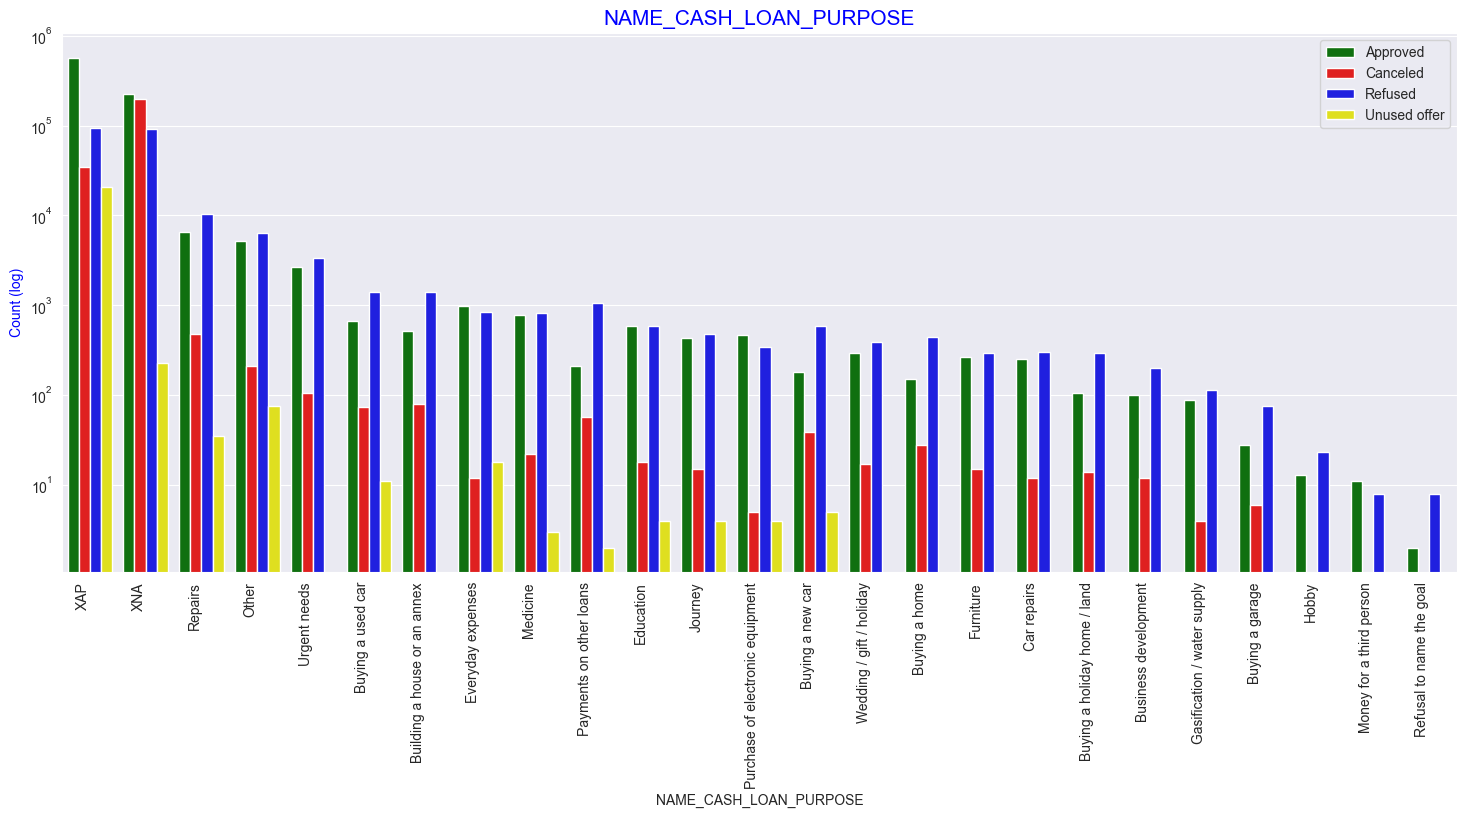

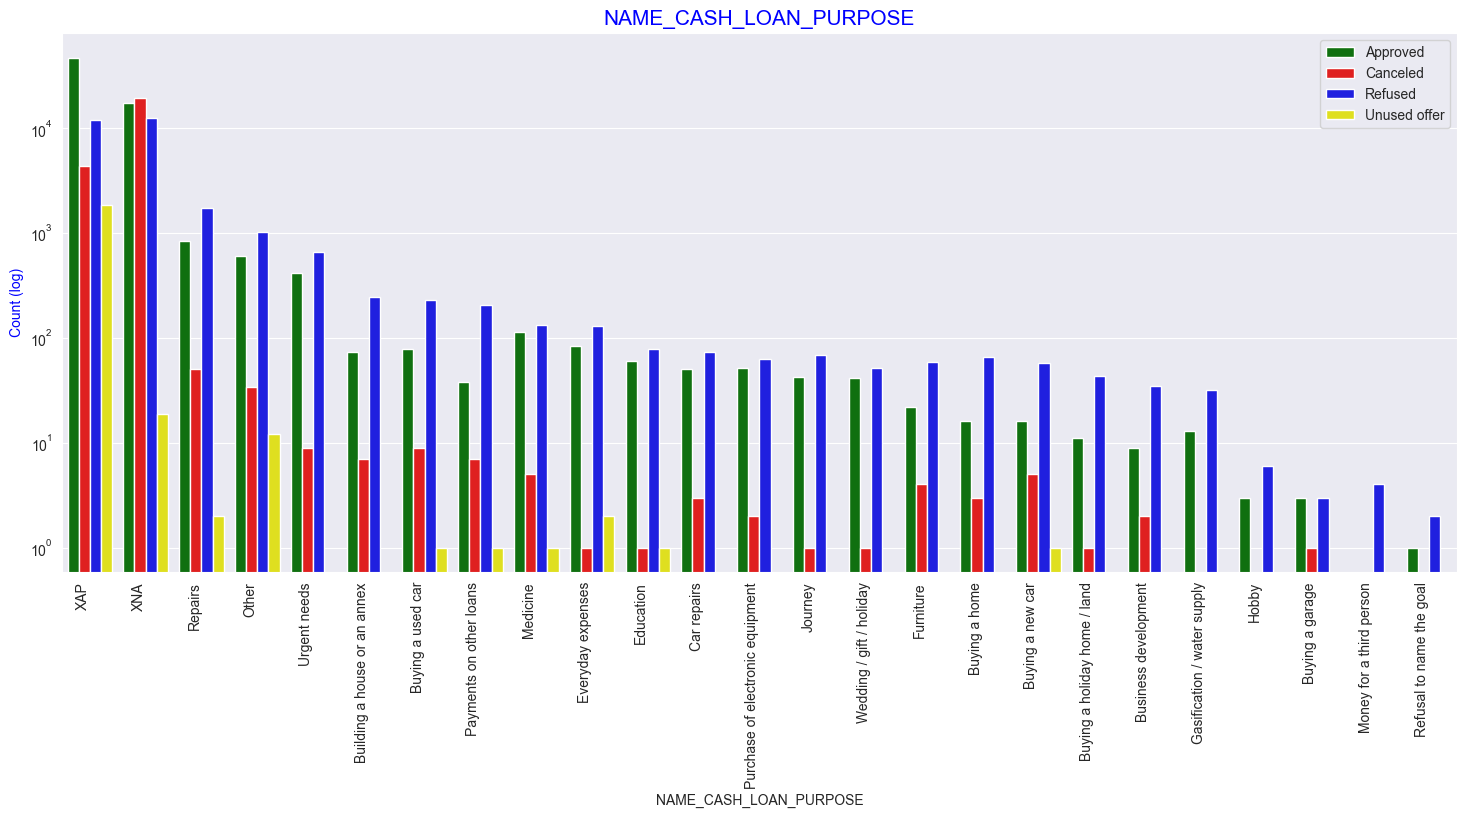

In [162]:
univariate_merged('NAME_CASH_LOAN_PURPOSE',L0,'NAME_CONTRACT_STATUS',palette=['green','red','blue','yellow'],ylog=True,figsize=(18,7))

univariate_merged('NAME_CASH_LOAN_PURPOSE',L1,'NAME_CONTRACT_STATUS',palette=['green','red','blue','yellow'],ylog=True,figsize=(18,7))

# Inferences
- Loan purpose has high number of unknown values(XAP,XNA)
- Loan taken for the purpose of Repairs seems to have highest default rate
- A very high number application have been rejected by bank or refused by client which has purpose as repair or other.This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

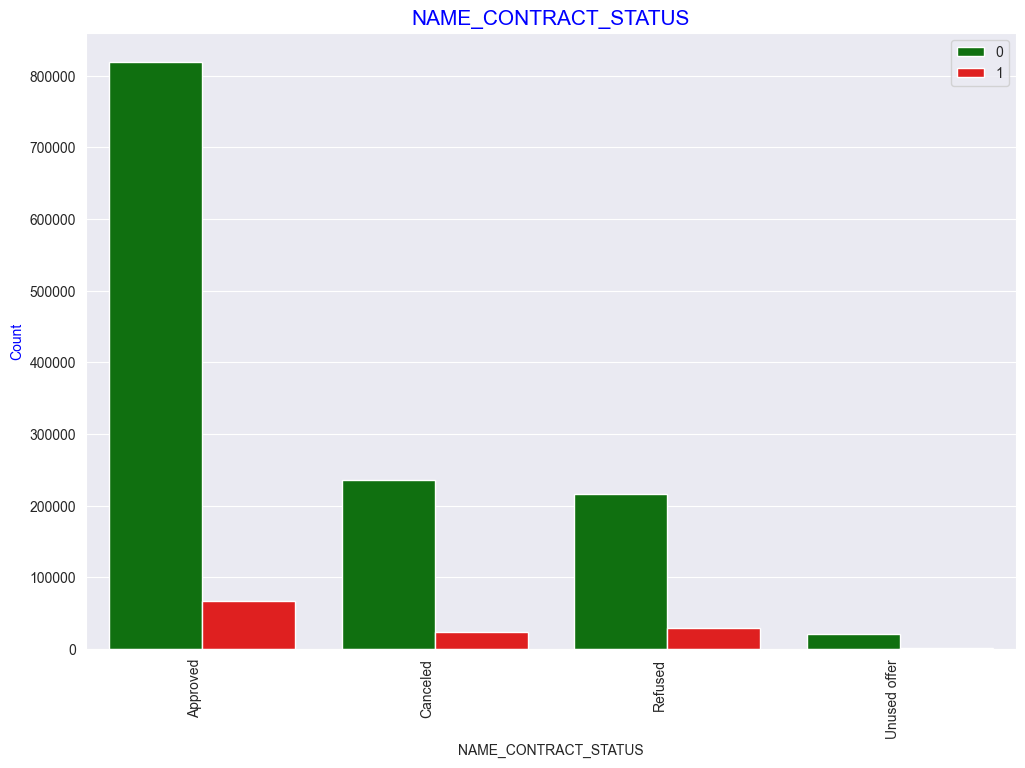

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [163]:
# Checking the contract status based on loan repayment status and whether there is any business loss or financial loss.
univariate_merged('NAME_CONTRACT_STATUS',loan_process_df,'TARGET',palette=['g','r'],ylog=False,figsize=(12,8))
g=loan_process_df.groupby('NAME_CONTRACT_STATUS')['TARGET']
df1=pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1,keys=('Counts','Percentage'))  

df1['Percentage']=df1['Percentage'].astype(str)+'%'
print(df1)

## Interpretation
- 90% of the previously cancelled client actually repayed the loan. Revisiting the interest rates would increase business opportunity for these clients
- 88% of the clients who have been previously refused a loan has payed back the loan in current case.
- Refual reason should be recorded for further analysis as these clients would turn into potential repaying customer.

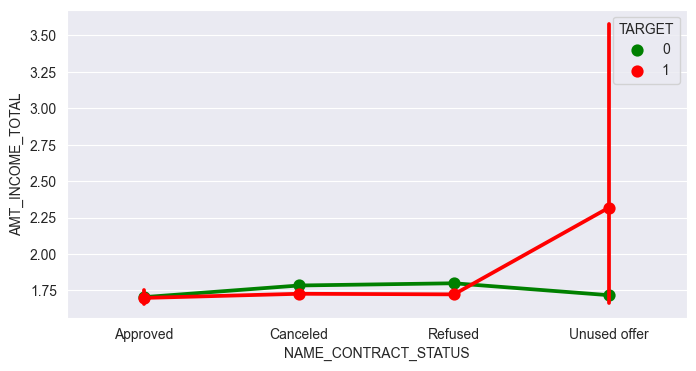

In [164]:
## Plotting the relationship between income total and contact status
merged_pointplot('NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL')

## Interpretation
The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others.

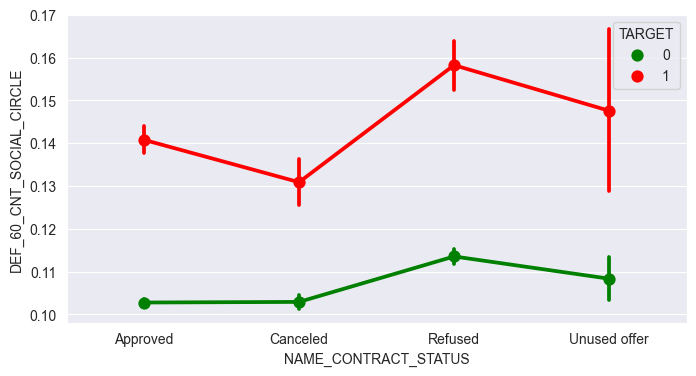

In [165]:
# Plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot('NAME_CONTRACT_STATUS','DEF_60_CNT_SOCIAL_CIRCLE')

## Interpretation
Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

# Conclusions
After analysing the datasets,there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not.The analysis is consised as below with the contributing factors and categorization.

### Decisive Factor whether an applicant will be Repayer:
 1) Name_EDUCATION_TYPE: Academic degree has less defaults.
 2) NAME_INCOME_TYPE: Student and Business have no defaults.
 3) REGION_RATING_CLIENT: RATING 1 is safer.
 4) ORGANIZATION_TYPE: Clients with Trade type 4 and 5 and Industry type 8 have defaulted less than 3%.
 5) DAYS_BIRTH: People above age of 50 have low probability of defaulting.
 6) DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate.
 7) AMT_INCOME_TOTAL: Applicant with Income more than 700,000 are less likely to default.
 8) NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby,Buying garage are being repayed mostly.
 9) CNT_CHILDREN: People with zero to two children tend to repay the loans.

### Decisive Factor whether an applicant will be Defaulter
 1) CODE_GENDER: Men are at relatively higher default rate
 2) NAME_FAMILY_STATUS: People who have civil marriage or who are single default a lot.
 3) NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary xeducation.
 4) NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
 5) REGION_RATING_CLIENTS: People who live in Rating 3 has highest defaults.
 6) OCCUPATION_TYPE: Avoid Low-skill Laborers,Driver and Waiters/barmen staff,Security staff,Labores and Cooking staff as the default rate is huge.
 7) ORGANIZATION_TYPE: Organization with highest percent of loans not repaid are Transport: type 3 (16%),Industry: type 13 (13.5%),Industry:type 8 (12.5%) and Restaurant(less than 12%).Self-employed people have relative high defaulting rate,and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
 8) DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting.
 9) DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
 10) CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have childern equal to or more than 9 default 100% and hence their applications are to be rejected.
 11) AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

The following attributes indicate that people from these category tend to default but then due to the number of people and the amount of loan, the bank could provide loan with higher interest to mitigate any default risk thus preventing business loss:

1) NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.
2) AMT_CREDIT: People who get loan for 300-600k tend to default more than others and hence having higher interest specifically for this credit range would be ideal.
3) AMT_INCOME: Since 90% of the applications have Income total less than 300,000 and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.
4) CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.
5) NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.

### Other suggestions:
- 90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.
- 88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.